# READ DATA

In [1]:
import pandas as pd
from pandas import Timedelta
import numpy as np
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import missingno as msno

In [2]:
pd.set_option('display.max_columns', None)

In [9]:
DATA_FOLDER = "../data"
INPUT = DATA_FOLDER + "/all_data_after_transformation.xlsx"
OUTPUT_FOLDER = '../data'

In [101]:
df = pd.read_excel(INPUT, sheet_name="Data")

In [102]:
df.head()

ID_BB_COMPANY     bond_isin default_date     rr1_7     rr2_7    rr1_30  \
0         129240  CH0002725106   1996-08-03  0.721750  0.718437  0.466602   
1         116977  US704378AD06   1997-07-21  0.247997  0.241752  0.212016   
2         103782  US318908AA80   1997-08-01  0.675271  0.673903  0.593823   
3         129443  CH0001237681   1997-10-15  1.018514  1.017482  1.018567   
4         129443  CH0001352027   1997-10-15  0.851555  0.848116  0.851770   

     rr2_30 currency                     seniorioty  \
0  0.464364      USD                      Unsecured   
1  0.205964      USD  Senior Subordinated Unsecured   
2  0.590595      USD         Subordinated Unsecured   
3  1.017481      CHF                      Unsecured   
4  0.848148      CHF                      Unsecured   

                  seniorioty_adj  coupon rate  coupon frequency  \
0                      Unsecured        0.750               1.0   
1  Senior Subordinated Unsecured        9.125               2.0   
2         Subordinated Unsecured        9.000               2.0   
3                      Unsecured        0.125               1.0   
4                      Unsecured        0.500               1.0   

    maturity_type      call type              put type  Convertible  \
0   CONV/PUT/CALL            NaN    On Specified Dates          NaN   
1        CALLABLE  Ordinary Call                   NaN          NaN   
2  CONV/CALL/SINK            NaN                   NaN  Convertible   
3   CONV/PUT/CALL            NaN  On or After Any Date          NaN   
4       CONV/CALL            NaN                   NaN          NaN   

  coupon type -code          coupon type - desciption domicile_country  \
0              FXPV  Fixed:Plain Vanilla Fixed Coupon      South Korea   
1              FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
2              FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
3              FXPV  Fixed:Plain Vanilla Fixed Coupon      South Korea   
4              FXPV  Fixed:Plain Vanilla Fixed Coupon      South Korea   

  exchange_country         Industry_sector                   Industry_group  \
0      South Korea  Consumer Discretionary  Consumer Discretionary Products   
1    United States  Consumer Discretionary   Retail & Whsle - Discretionary   
2    United States              Financials                        Insurance   
3      South Korea              Technology   Tech Hardware & Semiconductors   
4      South Korea              Technology   Tech Hardware & Semiconductors   

        Industry_subgroup           event_type  \
0       Home Construction  Default Corp Action   
1  Retail - Discretionary    Bankruptcy Filing   
2               Insurance  Default Corp Action   
3     Technology Hardware    Bankruptcy Filing   
4     Technology Hardware    Bankruptcy Filing   

                event_type_subcategory          event_type_subcategory_sum  \
0                 Reason: Loan payment                Missing Loan payment   
1              Filing Type: Protection                          Protection   
2   Reason: Coupon & principal payment  Missing Coupon & principal payment   
3              Filing Type: Protection                          Protection   
4              Filing Type: Protection                          Protection   

             exit_type                exit_type_subcategory   SP500 MD  \
0  Default Corp Action                 Reason: Loan payment   39.34404   
1    Bankruptcy Filing              Filing Type: Protection  148.54344   
2  Default Corp Action   Reason: Coupon & principal payment  172.04832   
3    Bankruptcy Filing              Filing Type: Protection  136.14092   
4    Bankruptcy Filing              Filing Type: Protection  136.14092   

   Average daily 1-year SP500 return  Ratio to MA  \
0                           0.000694    27.646443   
1                           0.001534    -1.680883   
2                           0.001474    -5.084293   
3                           0.00

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Columns: 202 entries, ID_BB_COMPANY to default_duration
dtypes: bool(2), datetime64[ns](2), float64(174), int64(4), object(20)
memory usage: 3.2+ MB


CHECKING DUPLICATES

In [104]:
# Print duplicate rows in DataFrame
duplicates = df[df.duplicated()]
print("\nDuplicate Rows:")
duplicates


Duplicate Rows:


Empty DataFrame
Columns: [ID_BB_COMPANY, bond_isin, default_date, rr1_7, rr2_7, rr1_30, rr2_30, currency, seniorioty, seniorioty_adj, coupon rate, coupon frequency, maturity_type, call type, put type, Convertible, coupon type -code, coupon type - desciption, domicile_country, exchange_country, Industry_sector, Industry_group, Industry_subgroup, event_type, event_type_subcategory, event_type_subcategory_sum, exit_type, exit_type_subcategory, SP500 MD, Average daily 1-year SP500 return, Ratio to MA, US Corporate Bond Yield Spread, US Corporate Bond Yield Spread(1-3 year), US Corporate Bond Yield Spread(3-5 year), US Corporate Bond Yield Spread(5-7 year), US Corporate Bond Yield Spread(7-10 year), US Corporate Bond Yield Spread(10+ year), US Generic Govt 3 Month Yield, US Generic Govt 6 Month Yield, US Generic Govt 12 Month Yield, US Generic Govt 2 Year Yield, US Generic Govt 3 Year Yield, US Generic Govt 5 Year Yield, US Generic Govt 7 Year Yield, US Generic Govt 10 Year Yield, marketcap, sector_domicile_dtd, sector_exchange_dtd, sector_dtd, PD_1_domicile_sector, PD_3_domicile_sector, PD_12_domicile_sector, PD_1_domicile_subsec, PD_3_domicile_subsec, PD_12_domicile_subsec, PD_1_exch_sector, PD_3_exch_sector, PD_12_exch_sector, PD_1_exch_subsector, PD_3_exch_subsector, PD_12_exch_subsector, PD_1_global_sector, PD_3_global_sector, PD_12_global_sector, PD_1_global_subsector, PD_3_global_subsector, PD_12_global_subsector, domicile_subsec_dtd, exch_subsector_dtd, subsector_dtd, Stock_Index_Return, Three_Month_Rate_After_Demean, DTD_Level, DTD_Trend, CA_Over_CL_Level, CA_Over_CL_Trend, NI_Over_TA_Level, NI_Over_TA_Trend, Size_Level, Size_Trend, M_Over_B, Sigma, Cash_Over_TA_Level, Cash_Over_TA_Trend, DTD_Median_Fin, DTD_Median_NonFin, Dummy_For_China_SOE, Dummy_For_Group_297_Fin, 1-year_GDP_growth, 1-year_CPI_growth, 1-year_PPI_growth, 1-year_M1_growth, 1-year_M2_growth, employment_rate, treasury_rate, interest_rate, economic_policy_uncertainty, 1-year_housing, mktcap_median, JP_market_sentiment, ...]
Index: []

In [105]:
# remove target variables
target_variables = ['rr1_7', 'rr2_7', 'rr1_30', 'rr2_30']
all_feature_cols = [i for i in df.columns if i not in target_variables]

# remove bond ID
all_feature_cols.remove('bond_isin')

duplicate_subset = df.duplicated(subset=all_feature_cols, keep=False)
different_values = ~df.duplicated(keep=False)
conflicting_rows = df[duplicate_subset & different_values]
print("\nRows with duplicate values in features but different values in target variables:")
conflicting_rows


Rows with duplicate values in features but different values in target variables:


ID_BB_COMPANY     bond_isin default_date     rr1_7     rr2_7    rr1_30  \
81           826241  US458742AA19   2001-08-16  1.046432  1.044894  1.049399   
82           826241  US458742AB91   2001-08-16  0.174694  0.173017  0.175928   
170          826241  US458742AA19   2002-07-10  1.029361  1.000000  1.026554   
171          826241  US458742AB91   2002-07-10  0.148111  0.143886  0.145305   
224          348430  US05164BAC00   2003-07-01  0.497997  0.479253  0.527200   
...             ...           ...          ...       ...       ...       ...   
2052       53409858  US146869AB81   2023-07-19  0.926004  0.909663  0.908406   
2053       53409858  USU1468GAE45   2023-07-19  0.741859  0.730580  0.749690   
2054       53409858  US146869AD48   2023-07-19  0.631624  0.619988  0.635436   
2055       53409858  USU1468GAG92   2023-07-19  0.818844  0.799496  0.815234   
2056       53409858  US146869AF95   2023-07-19  0.744002  0.732691  0.750190   

        rr2_30 currency                     seniorioty  \
81    1.044762      USD               Senior Unsecured   
82    0.173712      USD               Senior Unsecured   
170   1.000000      USD               Senior Unsecured   
171   0.141432      USD               Senior Unsecured   
224   0.505206      USD  Senior Subordinated Unsecured   
...        ...      ...                            ...   
2052  0.890297      USD               Senior Unsecured   
2053  0.736595      USD               Senior Unsecured   
2054  0.622204      USD               Senior Unsecured   
2055  0.792623      USD               Senior Unsecured   
2056  0.737087      USD               Senior Unsecured   

                     seniorioty_adj  coupon rate  coupon frequency  \
81                 Senior Unsecured        7.000               2.0   
82                 Senior Unsecured        7.000               2.0   
170                Senior Unsecured        7.000               2.0   
171                Senior Unsecured        7.000               2.0   
224   Senior Subordinated Unsecured        9.875               2.0   
...                             ...          ...               ...   
2052               Senior Unsecured        5.625               2.0   
2053               Senior Unsecured        5.500               2.0   
2054               Senior Unsecured        5.875               2.0   
2055               Senior Unsecured       10.250               2.0   
2056               Senior Unsecured        5.500               2.0   

     maturity_type      call type put type  Convertible coupon type -code  \
81       CONV/CALL            NaN      NaN  Convertible              FXPV   
82       CONV/CALL            NaN      NaN  Convertible              FXPV   
170      CONV/CALL            NaN      NaN  Convertible              FXPV   
171      CONV/CALL            NaN      NaN  Convertible              FXPV   
224       CALLABLE            NaN      NaN          NaN              FXPV   
...            ...            ...      ...          ...               ...   
2052      CALLABLE  Ordinary Call      NaN          NaN              FXPV   
2053      CALLABLE  Ordinary Call      NaN          NaN              FXPV   
2054      CALLABLE  Ordinary Call      NaN          NaN              FXPV   
2055      CALLABLE  Ordinary Call      NaN          NaN              FXPV   
2056      CALLABLE  Ordinary Call      NaN          NaN              FXPV   

              coupon type - desciption domicile_country exchange_country  \
81    Fixed:Plain Vanilla Fixed Coupon    United States    United States   
82    Fixed:Plain Vanilla Fixed Coupon    United States    United States   
170   Fixed:Plain Vanilla Fixed Coupon    United States    United States   
171   Fixed:Plain Vanilla Fixed Coupon    United States    United States   
224   Fixed:Plain Vanilla Fixed Coupon    United States    United States   
...                                ...              ...              ...   
2052  Fixed:Plain Vanilla Fixed Coupon    United S

In [106]:
# unique duplicate rows with the same feature values but different in target variables and ID
print("\nUnique rows with duplicate values in features but different values in target variables:")
conflicting_rows = conflicting_rows[conflicting_rows.duplicated(subset=all_feature_cols)]
conflicting_rows


Unique rows with duplicate values in features but different values in target variables:


ID_BB_COMPANY     bond_isin default_date     rr1_7     rr2_7    rr1_30  \
82           826241  US458742AB91   2001-08-16  0.174694  0.173017  0.175928   
171          826241  US458742AB91   2002-07-10  0.148111  0.143886  0.145305   
225          348430  US05164BAD82   2003-07-01  0.497997  0.479253  0.527200   
229          968173  US604675AB42   2003-07-14  0.444583  0.443507  0.421352   
243          946063  US757209AB76   2003-11-03  0.445169  0.442821  0.511081   
...             ...           ...          ...       ...       ...       ...   
2050       53409858  USU1468GAF10   2023-07-19  0.615349  0.603500  0.626545   
2052       53409858  US146869AB81   2023-07-19  0.926004  0.909663  0.908406   
2054       53409858  US146869AD48   2023-07-19  0.631624  0.619988  0.635436   
2055       53409858  USU1468GAG92   2023-07-19  0.818844  0.799496  0.815234   
2056       53409858  US146869AF95   2023-07-19  0.744002  0.732691  0.750190   

        rr2_30 currency                     seniorioty  \
82    0.173712      USD               Senior Unsecured   
171   0.141432      USD               Senior Unsecured   
225   0.505206      USD  Senior Subordinated Unsecured   
229   0.419886      USD               Senior Unsecured   
243   0.507179      USD         Subordinated Unsecured   
...        ...      ...                            ...   
2050  0.613228      USD               Senior Unsecured   
2052  0.890297      USD               Senior Unsecured   
2054  0.622204      USD               Senior Unsecured   
2055  0.792623      USD               Senior Unsecured   
2056  0.737087      USD               Senior Unsecured   

                     seniorioty_adj  coupon rate  coupon frequency  \
82                 Senior Unsecured        7.000               2.0   
171                Senior Unsecured        7.000               2.0   
225   Senior Subordinated Unsecured        9.875               2.0   
229                Senior Unsecured        2.500               2.0   
243          Subordinated Unsecured        5.000               2.0   
...                             ...          ...               ...   
2050               Senior Unsecured        4.875               2.0   
2052               Senior Unsecured        5.625               2.0   
2054               Senior Unsecured        5.875               2.0   
2055               Senior Unsecured       10.250               2.0   
2056               Senior Unsecured        5.500               2.0   

      maturity_type      call type            put type  Convertible  \
82        CONV/CALL            NaN                 NaN  Convertible   
171       CONV/CALL            NaN                 NaN  Convertible   
225        CALLABLE            NaN                 NaN          NaN   
229   CONV/PUT/CALL  Ordinary Call  On Specified Dates          NaN   
243       CONV/CALL            NaN                 NaN          NaN   
...             ...            ...                 ...          ...   
2050       CALLABLE  Ordinary Call                 NaN          NaN   
2052       CALLABLE  Ordinary Call                 NaN          NaN   
2054       CALLABLE  Ordinary Call                 NaN          NaN   
2055       CALLABLE  Ordinary Call                 NaN          NaN   
2056       CALLABLE  Ordinary Call                 NaN          NaN   

     coupon type -code          coupon type - desciption domicile_country  \
82                FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
171               FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
225               FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
229               FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
243               FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
...                ...                               ...              ...   
2050              FXPV  Fixed:Plain Vanilla Fixed Coupon    United States   
2052              FXPV  Fixed:Plain Va

=> Will need to investigate why

CHECKING MISSING VALUES

In [107]:
# top 50 columns with missing values
missing_series = df.isnull().sum()
top_50_missing_series = missing_series.sort_values(ascending=False)[0:50]

<Axes: >

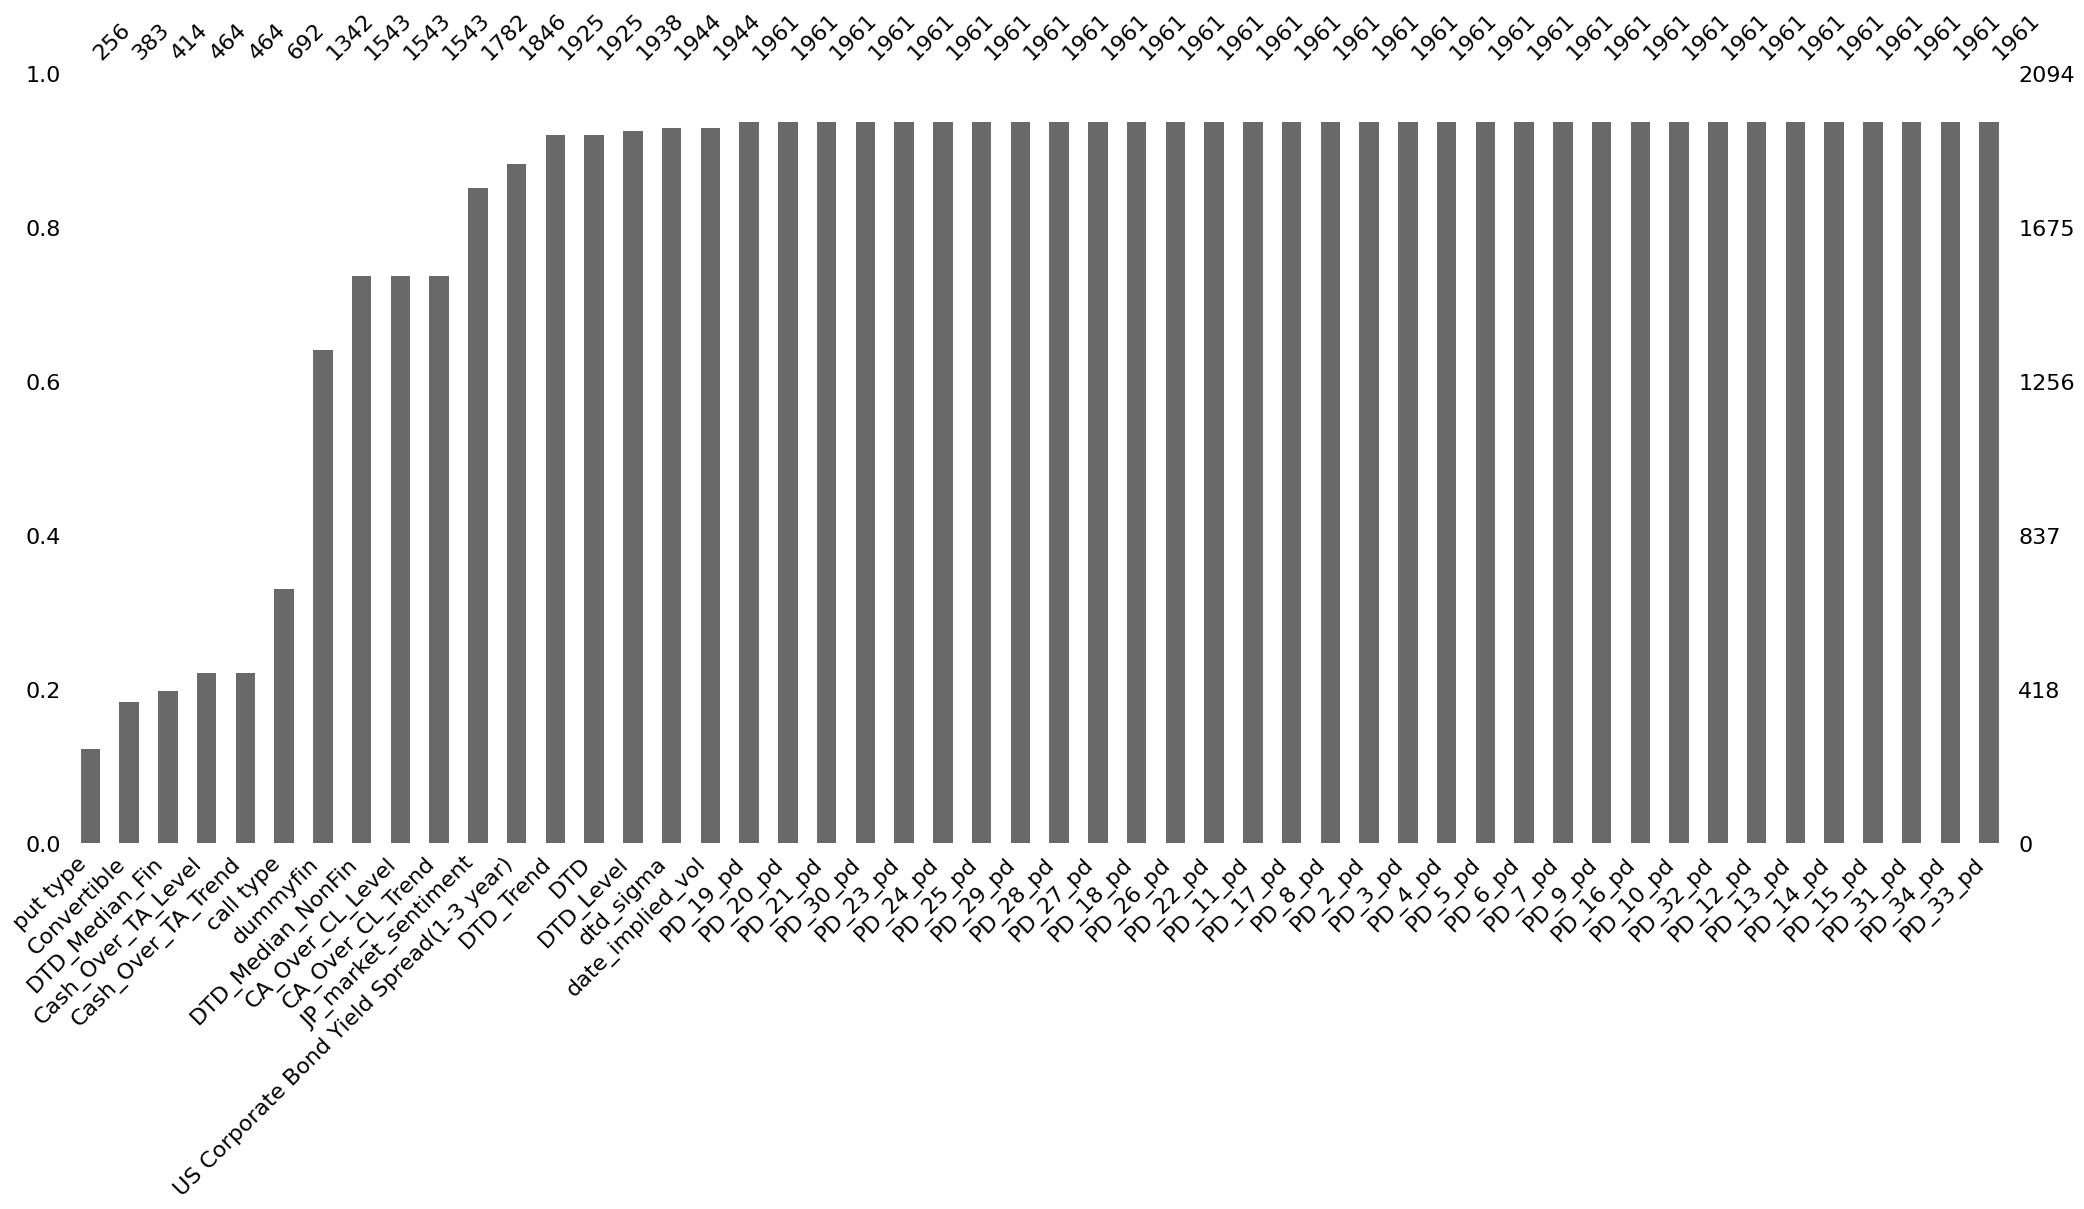

In [41]:
# check out the percentage of missing values
msno.bar(df[top_50_missing_series.index])

<Axes: >

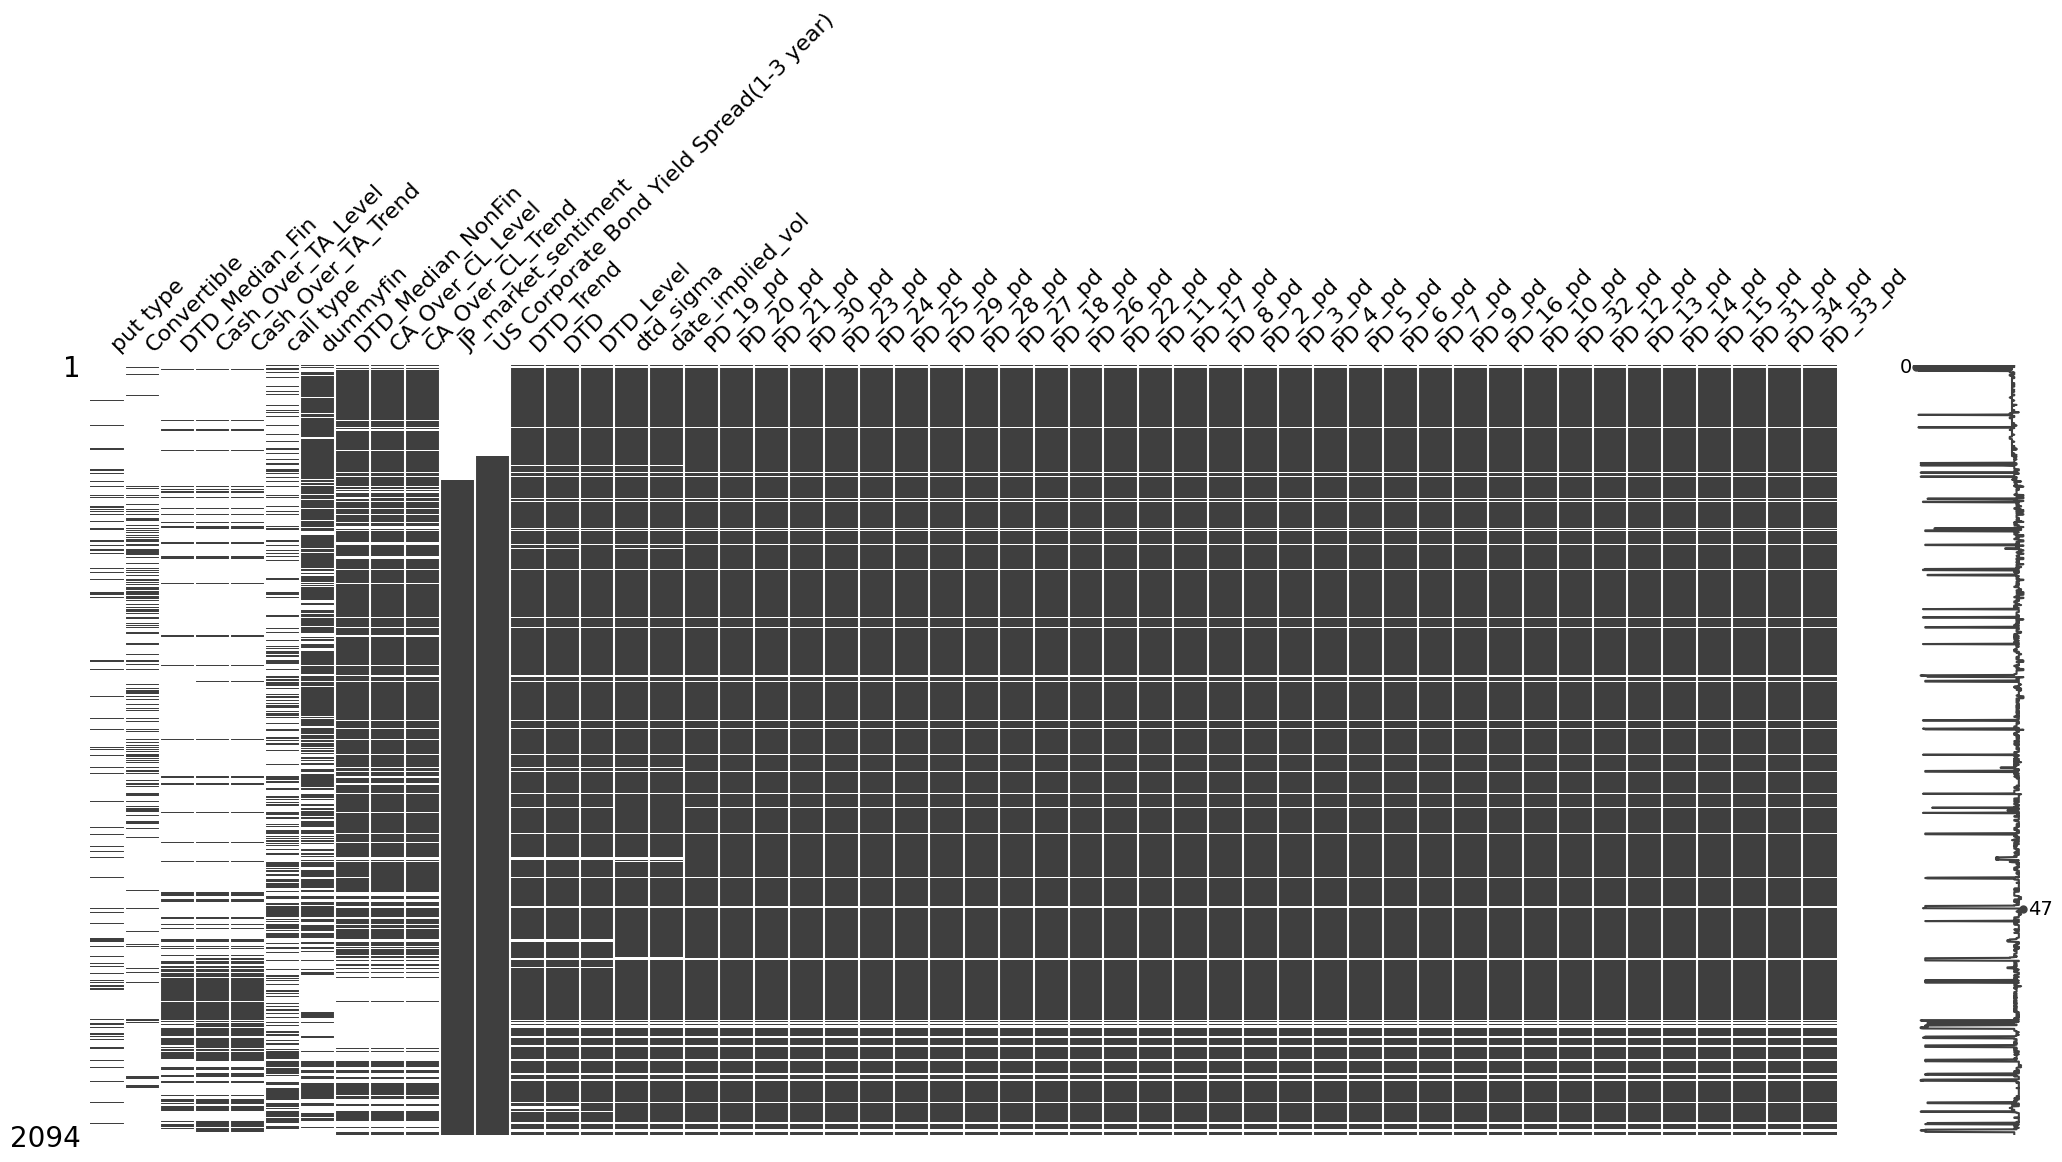

In [42]:
# missing value matrix
# notably, the missing values in columns DTD_median_nonfin, CA_Over_CL_Level, CA_Over_CL_Trend are most of the avaialble
# data in columns DTD_median_fin, Cash_over_TA_level and Cash_over_TA_Trend
# Besides that, missing values are quite random
msno.matrix(df[top_50_missing_series.index])

In [108]:
# Removing columns with lots of missing values, and unessential columns for prediction (dates, ID..)
cols_to_remove = ['ID_BB_COMPANY', 'bond_isin', 'default_date', 'coupon type - desciption', 'CA_Over_CL_Level', 'CA_Over_CL_Trend', 'Dummy_For_China_SOE',	'Dummy_For_Group_297_Fin',
                       'US Corporate Bond Yield Spread(1-3 year)', "DTD_Median_Fin",	"DTD_Median_NonFin", "Cash_Over_TA_Level",	"Cash_Over_TA_Trend",
                       'coupon_category', 'duration_category', 'JP_market_sentiment', 'DTD_Trend', 'Size_Level',	'Size_Trend',
                      'NI_Over_TA_Level', 'NI_Over_TA_Trend','dummyfin', "date_implied_vol"
                      #'time_exit', 'issue_date', 'maturity_date', 'INDUSTRY_SECTOR_NUM', 'INDUSTRY_GROUP_NUM', 'Announcement Date', ' DTD_Level', 'date_implied_vol', 'revenue_exch_curr']
                      ]


df_nonNA = df.drop(columns=cols_to_remove, errors='ignore')

In [109]:
# fill NA values for categorical features
bond_cat_features = ["coupon frequency", "maturity_type", "call type", "put type", "Convertible"]
df_nonNA[bond_cat_features] = df_nonNA[bond_cat_features].fillna("NA")

In [110]:
df_nonNA.dropna(inplace=True)

In [111]:
df_nonNA.shape

(1725, 179)

In [112]:
### checking duplicate values again after dropping some columns

# Print duplicate rows in DataFrame
all_dup = df_nonNA[df_nonNA.duplicated()]
print(f"Duplicate rows after dropping some cols with target variables included: length {len(all_dup)}")
all_dup

Duplicate rows after dropping some cols with target variables included: length 55


rr1_7     rr2_7    rr1_30    rr2_30 currency  \
225   0.497997  0.479253  0.527200  0.505206      USD   
229   0.444583  0.443507  0.421352  0.419886      USD   
243   0.445169  0.442821  0.511081  0.507179      USD   
285   0.245794  0.239407  0.285347  0.276957      USD   
286   0.240866  0.235410  0.280525  0.273329      USD   
295   0.050405  0.049675  0.052550  0.051649      USD   
362   0.141562  0.141342  0.142943  0.142522      USD   
398   0.241265  0.241089  0.242781  0.242197      USD   
417   0.115675  0.114296  0.119119  0.117410      USD   
475   0.360717  0.360088  0.364063  0.362165      USD   
478   0.723370  0.706388  0.708200  0.699523      USD   
479   0.792390  0.774540  0.768374  0.753276      USD   
491   0.457969  0.457721  0.408111  0.407361      USD   
504   0.433053  0.425351  0.416978  0.414433      USD   
533   0.604233  0.595105  0.625986  0.615131      USD   
584   0.120868  0.120132  0.207456  0.205966      USD   
587   0.746134  0.744522  0.748629  0.745420      USD   
611   0.634250  0.630436  0.636345  0.631203      USD   
622   0.056750  0.056012  0.054201  0.053404      USD   
623   0.983022  0.980549  0.983880  0.980566      USD   
670   0.194722  0.188839  0.172694  0.166830      USD   
744   0.852988  0.815989  0.864610  0.822701      USD   
745   0.918791  0.901844  0.929160  0.907520      USD   
754   0.728651  0.711074  0.725019  0.705267      USD   
778   0.522481  0.516401  0.585790  0.577060      USD   
828   1.008847  1.000000  1.010300  1.000000      USD   
856   0.158853  0.154773  0.147846  0.143641      USD   
857   0.162660  0.157897  0.137941  0.134930      USD   
867   0.141086  0.140033  0.114042  0.112942      USD   
871   0.192214  0.190833  0.158133  0.156662      USD   
903   1.004565  1.000000  1.005943  1.000000      USD   
938   0.739437  0.723943  0.740152  0.724248      USD   
985   0.255386  0.253901  0.208792  0.206617      USD   
993   0.845666  0.826808  0.856941  0.835629      USD   
1019  0.570615  0.567027  0.577504  0.572618      USD   
1083  1.064352  1.038870  1.070875  1.041707      USD   
1117  0.320917  0.315783  0.351303  0.344823      USD   
1121  0.592960  0.576228  0.594063  0.575419      USD   
1163  0.318943  0.310392  0.350634  0.339459      USD   
1233  0.802970  0.798318  0.827239  0.821172      USD   
1263  0.601607  0.580460  0.601607  0.580460      USD   
1331  0.969484  0.966874  0.997335  0.991095      USD   
1356  0.094072  0.093950  0.093594  0.093223      USD   
1417  1.092845  1.090134  1.068546  1.064344      USD   
1498  0.410952  0.408543  0.324757  0.321924      USD   
1500  0.393151  0.392073  0.317396  0.315538      USD   
1539  1.018424  1.004934  1.020780  1.004922      USD   
1542  0.030589  0.030589  0.030592  0.030592      USD   
1571  0.854524  0.836400  0.877589  0.856573      USD   
1572  0.581592  0.568511  0.535412  0.521908      USD   
1653  1.000000  1.000000  1.000000  1.000000      USD   
1906  1.012682  1.000000  1.014437  1.000000      USD   
1956  0.495379  0.489241  0.511234  0.503589      USD   
1957  1.056268  1.039178  1.055617  1.032572      USD   
1963  1.005590  1.000000  1.008273  1.000000      USD   

                         seniorioty                 seniorioty_adj  \
225   Senior Subordinated Unsecured  Senior Subordinated Unsecured   
229                Senior Unsecured               Senior Unsecured   
243          Subordinated Unsecured         Subordinated Unsecured   
285                Senior Unsecured               Senior Unsecured   
286                Senior Unsecured               Senior Unsecured   
295                Senior Unsecured               Senior Unsecured   
362                Senior Unsecured               Senior Unsecured   
398                Senior Unsecured               Senior Unsecured   
417                Senior Unsecured               Senior Unsecured   
475                Senior Unsecured               Senior Unsecured   
478                Senior Unsecured           

In [113]:
# print out duplicate values

# print("2 duplicate rows")
# display(df_nonNA[(df_nonNA== df_nonNA.loc[2059, :]).all(axis=1)])

# print("Now examine these rows with the removed columns to see why")
# df.loc[[2058, 2059], :]

# => Seems like they only differ in ID

In [114]:
# check after removing target variables, how many duplicate rows with the same feature values

all_feature_cols = [i for i in df_nonNA.columns if i not in target_variables]

duplicate_subset = df_nonNA.duplicated(subset=all_feature_cols)
different_values = ~df_nonNA.duplicated()
conflicting_rows_nonNA = df_nonNA[duplicate_subset & different_values]
print("\nUnique rows with same values in features but different values in target variables:")
conflicting_rows_nonNA


Unique rows with same values in features but different values in target variables:


rr1_7     rr2_7    rr1_30    rr2_30 currency        seniorioty  \
82    0.174694  0.173017  0.175928  0.173712      USD  Senior Unsecured   
171   0.148111  0.143886  0.145305  0.141432      USD  Senior Unsecured   
361   0.140732  0.140504  0.142894  0.142456      USD  Senior Unsecured   
384   0.809690  0.791284  0.812430  0.791735      USD  Senior Unsecured   
406   0.059462  0.059008  0.067572  0.066963      USD  Senior Unsecured   
...        ...       ...       ...       ...      ...               ...   
2050  0.615349  0.603500  0.626545  0.613228      USD  Senior Unsecured   
2052  0.926004  0.909663  0.908406  0.890297      USD  Senior Unsecured   
2054  0.631624  0.619988  0.635436  0.622204      USD  Senior Unsecured   
2055  0.818844  0.799496  0.815234  0.792623      USD  Senior Unsecured   
2056  0.744002  0.732691  0.750190  0.737087      USD  Senior Unsecured   

        seniorioty_adj  coupon rate coupon frequency  maturity_type  \
82    Senior Unsecured        7.000              2.0      CONV/CALL   
171   Senior Unsecured        7.000              2.0      CONV/CALL   
361   Senior Unsecured        3.250              2.0  CONV/PUT/CALL   
384   Senior Unsecured        6.000              2.0  CONV/PUT/CALL   
406   Senior Unsecured        3.125              2.0  CONV/PUT/CALL   
...                ...          ...              ...            ...   
2050  Senior Unsecured        4.875              2.0       CALLABLE   
2052  Senior Unsecured        5.625              2.0       CALLABLE   
2054  Senior Unsecured        5.875              2.0       CALLABLE   
2055  Senior Unsecured       10.250              2.0       CALLABLE   
2056  Senior Unsecured        5.500              2.0       CALLABLE   

          call type            put type  Convertible coupon type -code  \
82               NA                  NA  Convertible              FXPV   
171              NA                  NA  Convertible              FXPV   
361   Ordinary Call  On Specified Dates  Convertible              FXPV   
384   Ordinary Call  On Specified Dates           NA              FXPV   
406   Ordinary Call  On Specified Dates  Convertible              FXPV   
...             ...                 ...          ...               ...   
2050  Ordinary Call                  NA           NA              FXPV   
2052  Ordinary Call                  NA           NA              FXPV   
2054  Ordinary Call                  NA           NA              FXPV   
2055  Ordinary Call                  NA           NA              FXPV   
2056  Ordinary Call                  NA           NA              FXPV   

     domicile_country exchange_country         Industry_sector  \
82      United States    United States              Technology   
171     United States    United States              Technology   
361     United States    United States              Financials   
384     United States    United States          Communications   
406     United States    United States              Financials   
...               ...              ...                     ...   
2050    United States    United States  Consumer Discretionary   
2052    United States    United States  Consumer Discretionary   
2054    United States    United States  Consumer Discretionary   
2055    United States    United States  Consumer Discretionary   
2056    United States    United States  Consumer Discretionary   

                      Industry_group       Industry_subgroup  \
82          Software & Tech Services     Technology Services   
171         Software & Tech Services     Technology Services   
361                          Banking                 Banking   
384                            Media   Entertainment Content   
406                          Banking                 Banking   
...                              ...                     ...   
2050  Retail & Whsle - Discretionary  Retail - Discretionary   
2052  Retail & Whsle - Discretionary  Retail - Discretionary 

In [115]:
# checking if there are new duplicate cols after deleting the cols above
new_dup_indices = [i for i in conflicting_rows_nonNA.index if i not in conflicting_rows.index]
print("Length of incides of duplicate rows after dropping some columns that are not of initial duplicate rows: ",len(new_dup_indices))
print(f"Duplicate indices: {new_dup_indices}\n")

# print out all distinct duplicate ols
all_distinct_dup_rows = df_nonNA[df_nonNA.index.isin(new_dup_indices) & df_nonNA.duplicated(subset=all_feature_cols, keep=False)]
print(f"All new distinct duplicate rows: {all_distinct_dup_rows}\n")

# print out all new duplicate rows after dropping some cols
all_dup_rows = [df_nonNA.loc[(df_nonNA[all_feature_cols]== df_nonNA.loc[idx, all_feature_cols]).all(axis=1),:] for idx in new_dup_indices]
all_dup_rows = pd.concat(all_dup_rows) if len(all_dup_rows) > 0 else all_dup_rows
print(f"All new duplicate rows: {all_dup_rows}\n")

# print out the columns removed in the original dataset to see why there are new duplicate rows after dropping some cols
all_dup_rows_original = df.loc[all_dup_rows.index, cols_to_remove] if len(all_dup_rows) > 0 else []
print(f"All new duplicate rows of the cols removed from original dataframe: {all_dup_rows}")

Length of incides of duplicate rows after dropping some columns that are not of initial duplicate rows:  0
Duplicate indices: []

All new distinct duplicate rows: Empty DataFrame
Columns: [rr1_7, rr2_7, rr1_30, rr2_30, currency, seniorioty, seniorioty_adj, coupon rate, coupon frequency, maturity_type, call type, put type, Convertible, coupon type -code, domicile_country, exchange_country, Industry_sector, Industry_group, Industry_subgroup, event_type, event_type_subcategory, event_type_subcategory_sum, exit_type, exit_type_subcategory, SP500 MD, Average daily 1-year SP500 return, Ratio to MA, US Corporate Bond Yield Spread, US Corporate Bond Yield Spread(3-5 year), US Corporate Bond Yield Spread(5-7 year), US Corporate Bond Yield Spread(7-10 year), US Corporate Bond Yield Spread(10+ year), US Generic Govt 3 Month Yield, US Generic Govt 6 Month Yield, US Generic Govt 12 Month Yield, US Generic Govt 2 Year Yield, US Generic Govt 3 Year Yield, US Generic Govt 5 Year Yield, US Generic Govt

SPLIT INTO TRAINING AND TEST SET AND SAVE THE FILES

In [116]:
# save dataframe
df_nonNA.to_excel(DATA_FOLDER + "/all_data_cleaned.xlsx", index=False)

In [117]:
### SPLIT INTO TRAINING AND TEST SET

# select recovery rates in 30 days since default date as target variables
labels = df_nonNA['rr1_30']

# drop target variables
features = df_nonNA.drop(columns=['rr1_30', 'rr1_7', 'rr2_7', 'rr2_30'], axis=1, errors='ignore')
features_list = features.columns

# split data into training and test set
test_size = 0.25
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=test_size, random_state=42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# save training and test files
train_features.to_excel(DATA_FOLDER + "/train_features.xlsx", index=False)
test_features.to_excel(DATA_FOLDER + "/test_features.xlsx", index=False)
train_labels.to_excel(DATA_FOLDER + "/train_labels.xlsx", index=False)
test_labels.to_excel(DATA_FOLDER + "/test_labels.xlsx", index=False)

Training Features Shape: (1293, 175)
Training Labels Shape: (1293,)
Testing Features Shape: (432, 175)
Testing Labels Shape: (432,)


In [118]:
# Identify categorical features for one-hot encoding
categorical_features = df_nonNA.select_dtypes(include=['object', 'category', 'bool']).columns
categorical_features

Index(['currency', 'seniorioty', 'seniorioty_adj', 'coupon frequency',
       'maturity_type', 'call type', 'put type', 'Convertible',
       'coupon type -code', 'domicile_country', 'exchange_country',
       'Industry_sector', 'Industry_group', 'Industry_subgroup', 'event_type',
       'event_type_subcategory', 'event_type_subcategory_sum', 'exit_type',
       'exit_type_subcategory', 'defaulted_in_last_5_years',
       'defaulted_in_last_6_months'],
      dtype='object')

In [119]:
# convert types of categorical values to string for consistency
df_nonNA[categorical_features] = df_nonNA[categorical_features].astype(str)

In [120]:
# Apply one-hot encoding to categorical features
# drop the first category in each feature to avoid multicolinearity
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(df_nonNA[categorical_features]), columns=encoder.get_feature_names_out(categorical_features), index=df_nonNA.index)

In [121]:
# Concatenate encoded features with the original DataFrame (excluding original categorical features)
df_nonNA_enc = pd.concat([df_nonNA.drop(columns=categorical_features), encoded_features], axis=1)

In [122]:
df_nonNA_enc.head()

rr1_7     rr2_7    rr1_30    rr2_30  coupon rate   SP500 MD  \
23  0.247786  0.241969  0.259908  0.252843        9.000  173.34160   
25  0.030148  0.029552  0.032729  0.031998        5.750   75.71740   
26  0.969841  0.960390  0.972400  0.960490        5.675   99.16800   
27  1.047361  1.046199  1.047416  1.046196        0.125   99.16800   
28  0.848102  0.840452  0.848872  0.840574        1.750    5.96716   

    Average daily 1-year SP500 return  Ratio to MA  \
23                           0.000853    11.473520   
25                           0.000929    16.428166   
26                           0.000928    11.394231   
27                           0.000928    11.394231   
28                           0.000468   -31.928189   

    US Corporate Bond Yield Spread  US Corporate Bond Yield Spread(3-5 year)  \
23                      129.040726                                109.167206   
25                        0.000000                                119.518005   
26                      139.711166                                119.518005   
27                      139.711166                                119.518005   
28                      178.046844                                147.247757   

    US Corporate Bond Yield Spread(5-7 year)  \
23                                  130.7571   
25                                  146.7405   
26                                  146.7405   
27                                  146.7405   
28                                  176.0404   

    US Corporate Bond Yield Spread(7-10 year)  \
23                                 128.664383   
25                                 143.193298   
26                                 143.193298   
27                                 143.193298   
28                                 193.571960   

    US Corporate Bond Yield Spread(10+ year)  US Generic Govt 3 Month Yield  \
23                                154.285370                          4.576   
25                                168.452530                          5.088   
26                                168.452530                          5.223   
27                                168.452530                          5.223   
28                                231.104462                          6.210   

    US Generic Govt 6 Month Yield  US Generic Govt 12 Month Yield  \
23                          4.684                           4.749   
25                          5.271                           5.412   
26                          5.399                           5.475   
27                          5.399                           5.475   
28                          6.275                           6.090   

    US Generic Govt 2 Year Yield  US Generic Govt 3 Year Yield  \
23                         4.986                         5.102   
25                         5.787                         5.870   
26                         5.766                         5.846   
27                         5.766                         5.846   
28                         5.979                         5.950   

    US Generic Govt 5 Year Yield  US Generic Govt 7 Year Yield  \
23                         5.063                          4.39   
25                         5.946                          4.39   
26                         5.855                          4.39   
27                         5.855                          4.39   
28                         5.851                          4.39   

    US Generic Govt 10 Year Yield     marketcap  sector_domicile_dtd  \
23                          5.147     43.898750             2.143391   
25                          6.024     13.585384             2.672176   
26                          5.928  97668.179700             0.815991   
27                          5.928  97668.179700             0.815991   
28                          5.802   1802.768300             1.892195   

    sector_exchange_dtd  sector_dtd  PD_1_domicile_sector  \
23             2.1

In [123]:
# save file
df_nonNA_enc.to_excel(DATA_FOLDER + "/all_data_cleaned_with_one_hot_encoding.xlsx", index=False)

In [124]:
### SPLIT INTO TRAINING AND TEST SET

# drop target variables
features = df_nonNA_enc.drop(columns=['rr1_30', 'rr1_7', 'rr2_7', 'rr2_30'], axis=1, errors='ignore')

# split data into training and test set
test_size = 0.25
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=test_size, random_state=42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# save training and test files
train_features.to_excel(DATA_FOLDER + "/train_features_w_one_hot_enc.xlsx", index=False)
test_features.to_excel(DATA_FOLDER + "/test_features_w_one_hot_enc.xlsx", index=False)

Training Features Shape: (1293, 419)
Training Labels Shape: (1293,)
Testing Features Shape: (432, 419)
Testing Labels Shape: (432,)


In [125]:
# get numeric features
categorical_features = encoder.get_feature_names_out(categorical_features)
numeric_features = [i for i in train_features.columns if i not in categorical_features]

In [126]:
numeric_features

['coupon rate',
 'SP500 MD',
 'Average daily 1-year SP500 return',
 'Ratio to MA',
 'US Corporate Bond Yield Spread',
 'US Corporate Bond Yield Spread(3-5 year)',
 'US Corporate Bond Yield Spread(5-7 year)',
 'US Corporate Bond Yield Spread(7-10 year)',
 'US Corporate Bond Yield Spread(10+ year)',
 'US Generic Govt 3 Month Yield',
 'US Generic Govt 6 Month Yield',
 'US Generic Govt 12 Month Yield',
 'US Generic Govt 2 Year Yield',
 'US Generic Govt 3 Year Yield',
 'US Generic Govt 5 Year Yield',
 'US Generic Govt 7 Year Yield',
 'US Generic Govt 10 Year Yield',
 'marketcap',
 'sector_domicile_dtd',
 'sector_exchange_dtd',
 'sector_dtd',
 'PD_1_domicile_sector',
 'PD_3_domicile_sector',
 'PD_12_domicile_sector',
 'PD_1_domicile_subsec',
 'PD_3_domicile_subsec',
 'PD_12_domicile_subsec',
 'PD_1_exch_sector',
 'PD_3_exch_sector',
 'PD_12_exch_sector',
 'PD_1_exch_subsector',
 'PD_3_exch_subsector',
 'PD_12_exch_subsector',
 'PD_1_global_sector',
 'PD_3_global_sector',
 'PD_12_global_secto

In [127]:
# Standardize numeric features
scaler = StandardScaler()
train_features[numeric_features] = scaler.fit_transform(train_features[numeric_features])
test_features[numeric_features] = scaler.transform(test_features[numeric_features])

In [128]:
train_features.head()

coupon rate  SP500 MD  Average daily 1-year SP500 return  Ratio to MA  \
884      0.076542 -0.617065                          -0.548555     0.222844   
687     -0.428379  0.503155                           0.868665    -0.067991   
682      1.254689  0.319538                           0.734185    -0.084426   
1594     0.623539  2.425669                           2.156816    -0.063274   
1134     0.665616  0.761706                           0.713955    -0.046903   

      US Corporate Bond Yield Spread  \
884                         0.150389   
687                        -0.702390   
682                        -0.669313   
1594                       -0.825085   
1134                       -0.737131   

      US Corporate Bond Yield Spread(3-5 year)  \
884                                  -0.055950   
687                                  -0.621589   
682                                  -0.617779   
1594                                 -0.744474   
1134                                 -0.703722   

      US Corporate Bond Yield Spread(5-7 year)  \
884                                   0.213778   
687                                  -0.519884   
682                                  -0.461204   
1594                                 -0.792535   
1134                                 -0.811560   

      US Corporate Bond Yield Spread(7-10 year)  \
884                                    0.248018   
687                                   -0.799757   
682                                   -0.727569   
1594                                  -0.968892   
1134                                  -0.781453   

      US Corporate Bond Yield Spread(10+ year)  US Generic Govt 3 Month Yield  \
884                                   0.468146                      -0.649803   
687                                  -0.845123                      -0.749628   
682                                  -0.835670                      -0.765203   
1594                                 -1.117097                      -0.762076   
1134                                 -0.835300                       0.017454   

      US Generic Govt 6 Month Yield  US Generic Govt 12 Month Yield  \
884                       -0.571472                       -0.592947   
687                       -0.804669                       -0.922262   
682                       -0.819959                       -0.925332   
1594                      -0.819959                       -0.946701   
1134                       0.023680                        0.028304   

      US Generic Govt 2 Year Yield  US Generic Govt 3 Year Yield  \
884                      -0.497827                     -0.470189   
687                      -0.841013                     -0.663309   
682                      -0.841611                     -0.692651   
1594                     -1.020139                     -1.059607   
1134                      0.080167                      0.038833   

      US Generic Govt 5 Year Yield  US Generic Govt 7 Year Yield  \
884                      -0.438252                     -0.445920   
687                      -0.361205                     -0.217446   
682                      -0.343023                     -0.183653   
1594                     -1.002198                     -0.946148   
1134                     -0.015973                     -0.163032   

      US Generic Govt 10 Year Yield  marketcap  sector_domicile_dtd  \
884                       -0.424266  -0.092850            -0.496575   
687                       -0.021439   7.917502            -0.039543   
682                       -0.002762  -0.092100             2.125169   
1594                      -0.842834  -0.092940            -0.505158   
1134                      -0.225993  -0.091648             0.623959   

      sector_exchange_dtd  sector_dtd  PD_1_domicile_sector  \
884             -0.477016   -0.994185             -0.070304   
687              0.008567    0.282013             -0.093640   
682              2.308511    0.14

In [129]:
# save training and test files
train_features.to_excel(DATA_FOLDER + "/train_features_w_one_hot_enc_normalized.xlsx", index=False)
test_features.to_excel(DATA_FOLDER + "/test_features_w_one_hot_enc_normalized.xlsx", index=False)

# DATA VISUALIZATION

<Axes: xlabel='rr1_30', ylabel='Count'>

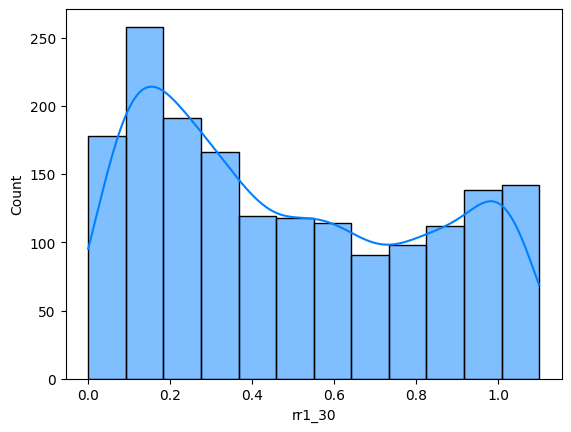

In [643]:
# histogram for target variable - recovery rates in 30 days since default date
sns.histplot(df_nonNA['rr1_30'], kde=True, bins=12, color=(0, 0.5, 1))

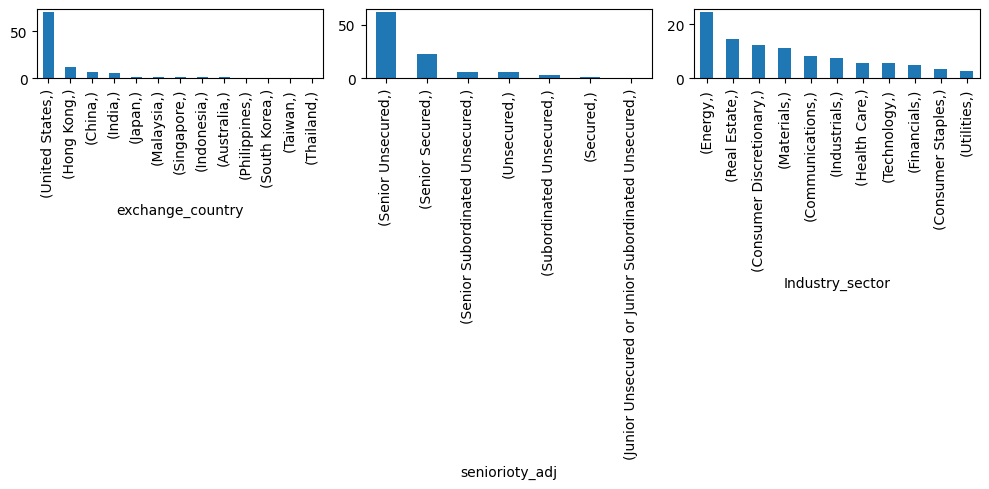

In [644]:
# histograms for key categorical features
cols = ["exchange_country", "seniorioty_adj", 'Industry_sector']
ngraph_per_line = 3

for i, col in enumerate(cols):
  m = i % ngraph_per_line

  if m == 0:
    fig, axes = plt.subplots(1, ngraph_per_line, figsize=(10, 5))
    axes = axes.flatten()

  values = df_nonNA[[col]].value_counts(normalize=True)[0:20] * 100
  values.plot(kind='bar', ax = axes[m])

  if m == (ngraph_per_line-1) or i == len(cols) - 1:
    plt.tight_layout()
    plt.show()

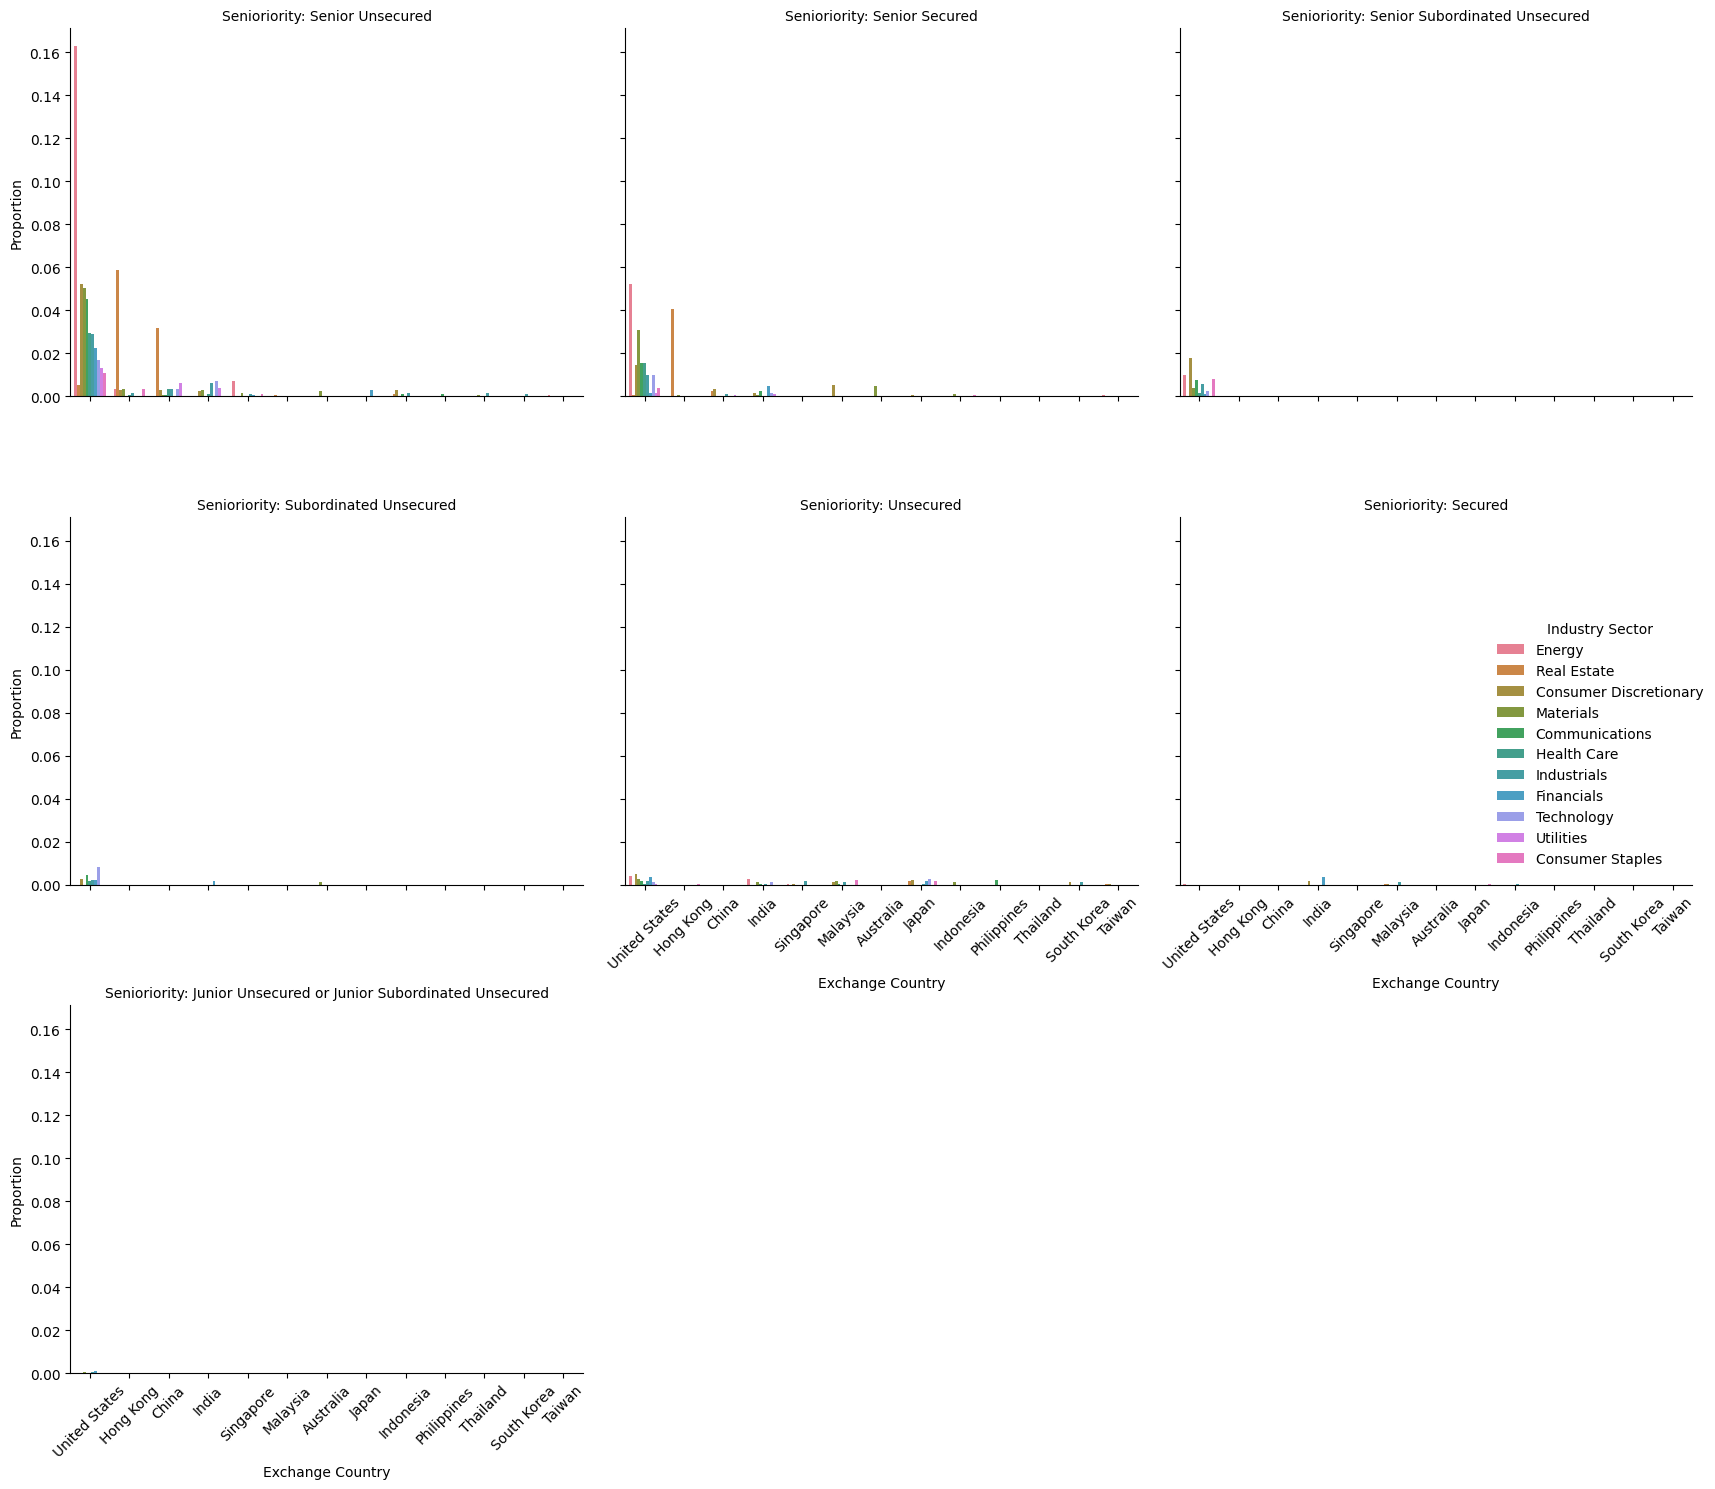

In [645]:
# compute the normalized values
value_counts_series = df_nonNA[cols].value_counts(normalize=True)

# Reset the index to convert the Series into a DataFrame
value_counts_df = value_counts_series.reset_index(name='proportion')


# Set the aesthetic style of the plots
# sns.set_style("whitegrid")
# sns.reset_defaults()

# Create a categorical plot
g = sns.catplot(
    data=value_counts_df,
    x="exchange_country",
    y="proportion",
    hue="Industry_sector",
    col="seniorioty_adj",
    kind="bar",
    height=5,
    aspect=1,
    col_wrap=3 
)

# Adjust the titles and labels
g.set_titles("Senioriority: {col_name}")
g.set_axis_labels("Exchange Country", "Proportion")
g._legend.set_title("Industry Sector")

# Rotate x-axis labels for better readability if necessary
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)


# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [647]:
# print out statistics
df_nonNA[['rr1_7', 'rr1_30', 'duration_in_years', 'coupon rate', '1_month_financial_uncertainty']].describe()

rr1_7       rr1_30  duration_in_years  coupon rate  \
count  1725.000000  1725.000000        1725.000000  1725.000000   
mean      0.492012     0.484504           8.342520     7.235843   
std       0.329272     0.331770           6.548858     2.954552   
min       0.000010     0.000010           0.838356     0.000000   
25%       0.188929     0.181116           5.002740     5.500000   
50%       0.437897     0.416978           7.005479     7.375000   
75%       0.796552     0.789588           9.676712     9.125000   
max       1.132619     1.099466         100.079452    15.500000   

       1_month_financial_uncertainty  
count                    1725.000000  
mean                        0.982965  
std                         0.180404  
min                         0.630639  
25%                         0.805958  
50%                         1.019304  
75%                         1.097665  
max                         1.548127

In [648]:
def percentile(n):
    def percentile_(x):
        return x.quantile(n)
    percentile_.__name__ = 'percentile_{:02.0f}'.format(n*100)
    return percentile_

In [650]:
coun = df_nonNA[['rr1_30', 'exchange_country']].groupby('exchange_country')
coun.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_30                                                    \
                  count      mean    median       std      skew       min   
exchange_country                                                            
Australia            14  0.685493  0.773199  0.312735 -0.694711  0.168975   
China               104  0.511591  0.479100  0.241753  0.575463  0.030250   
Hong Kong           200  0.356159  0.255750  0.287574  1.152877  0.000100   
India                85  0.684190  0.850268  0.365457 -0.473168  0.000010   
Indonesia            18  0.433911  0.390547  0.224732  0.698943  0.160482   
Japan                26  0.510079  0.511421  0.339349  0.200416  0.051851   
Malaysia             26  0.657490  1.001331  0.494244 -0.582236  0.000130   
Philippines           6  0.894750  0.937188  0.134344 -1.651971  0.643846   
Singapore            25  0.480712  0.514361  0.291496  0.138574  0.068558   
South Korea           6  0.964560  0.986140  0.081502 -1.608725  0.811670   
Taiwan                4  1.007057  1.007381  0.007413 -0.026951  1.000000   
Thailand              4  0.847181  1.053123  0.428410 -1.986489  0.205299   
United States      1207  0.476240  0.417375  0.328292  0.317309  0.007138   

                                                        
                 percentile_25 percentile_75       max  
exchange_country                                        
Australia             0.480523      0.882474  1.076444  
China                 0.358349      0.605258  1.091028  
Hong Kong             0.160292      0.466926  1.075000  
India                 0.306100      1.011489  1.099466  
Indonesia             0.226417      0.585790  0.962500  
Japan                 0.237599      0.826410  1.004030  
Malaysia              0.010670      1.037181  1.091909  
Philippines           0.873412      0.973412  1.012639  
Singapore             0.185878      0.707151  1.016556  
South Korea           0.957458      1.002609  1.047416  
Taiwan                1.000982      1.013457  1.013467  
Thailand              0.825534      1.074770  1.077180  
United States         0.169829      0.762054  1.097605

In [651]:
coun = df_nonNA[['rr1_30', 'currency']].groupby('currency')
coun.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_30                                                    \
          count      mean    median       std      skew       min   
currency                                                            
CAD           4  0.380482  0.291740  0.359131  1.361903  0.047666   
CHF           2  1.018177  1.018177  0.041350       NaN  0.988939   
CNY         103  0.542546  0.523753  0.225414  0.699048  0.150167   
EUR          14  0.737963  0.828505  0.336354 -0.610851  0.242788   
GBP           4  0.785763  0.918977  0.328821 -1.836274  0.299553   
HKD          12  0.748292  0.926084  0.382240 -1.212994  0.000100   
INR          25  0.845601  1.056506  0.325250 -1.098335  0.288448   
ISK           1  0.241529  0.241529       NaN       NaN  0.241529   
JPY          20  0.512517  0.464905  0.363018  0.112364  0.051851   
MYR          25  0.643790  1.002654  0.499371 -0.515099  0.000130   
NOK           3  0.998322  0.999880  0.006125 -1.070435  0.991569   
SEK           2  0.242043  0.242043  0.148513       NaN  0.137028   
SGD          20  0.420333  0.284928  0.314290  0.546572  0.068558   
THB           4  1.035604  1.053123  0.055017 -1.286589  0.958992   
TWD           3  1.009410  1.013453  0.007015 -1.732042  1.001309   
USD        1483  0.463313  0.392376  0.325614  0.396860  0.000010   

                                                
         percentile_25 percentile_75       max  
currency                                        
CAD           0.230177      0.442045  0.890783  
CHF           1.003558      1.032797  1.047416  
CNY           0.361068      0.625696  1.091028  
EUR           0.392103      1.029851  1.074331  
GBP           0.729861      0.974878  1.005544  
HKD           0.657882      1.010037  1.075000  
INR           0.770550      1.065272  1.099466  
ISK           0.241529      0.241529  0.241529  
JPY           0.196678      0.862638  1.004030  
MYR           0.008300      1.039028  1.091909  
NOK           0.995724      1.001699  1.003518  
SEK           0.189536      0.294550  0.347058  
SGD           0.160708      0.691660  1.016556  
THB           1.013957      1.074770  1.077180  
TWD           1.007381      1.013460  1.013467  
USD           0.168817      0.752689  1.097605

SUMMARY STATISTICS OF RECOVERY RATE ACCORDING TO SENIORITY LEVEL

In [652]:
sen = df_nonNA[['rr1_30', 'seniorioty_adj']].groupby('seniorioty_adj')
sen.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_30                      \
                                                   count      mean    median   
seniorioty_adj                                                                 
Junior Unsecured or Junior Subordinated Unsecured      4  0.217501  0.065879   
Secured                                               16  0.474130  0.303719   
Senior Secured                                       397  0.591814  0.628834   
Senior Subordinated Unsecured                        101  0.384647  0.299553   
Senior Unsecured                                    1067  0.452128  0.374415   
Subordinated Unsecured                                43  0.360301  0.242722   
Unsecured                                             97  0.573206  0.616298   

                                                                       \
                                                        std      skew   
seniorioty_adj                                                          
Junior Unsecured or Junior Subordinated Unsecured  0.319439  1.981036   
Secured                                            0.369370  0.506486   
Senior Secured                                     0.332981 -0.087871   
Senior Subordinated Unsecured                      0.316097  0.619360   
Senior Unsecured                                   0.316652  0.485346   
Subordinated Unsecured                             0.320573  1.075890   
Unsecured                                          0.380488 -0.159142   

                                                                           \
                                                        min percentile_25   
seniorioty_adj                                                              
Junior Unsecured or Junior Subordinated Unsecured  0.042355      0.046881   
Secured                                            0.004534      0.290937   
Senior Secured                                     0.010109      0.274409   
Senior Subordinated Unsecured                      0.015000      0.098545   
Senior Unsecured                                   0.000010      0.169807   
Subordinated Unsecured                             0.012895      0.122137   
Unsecured                                          0.000130      0.156084   

                                                                           
                                                  percentile_75       max  
seniorioty_adj                                                             
Junior Unsecured or Junior Subordinated Unsecured      0.236500  0.695892  
Secured                                                0.686026  1.068766  
Senior Secured                                         0.901750  1.099466  
Senior Subordinated Unsecured                          0.652944  1.059611  
Senior Unsecured                                       0.700646  1.094128  
Subordinated Unsecured                                 0.459043  1.068377  
Unsecured                                              0.988939  1.075000

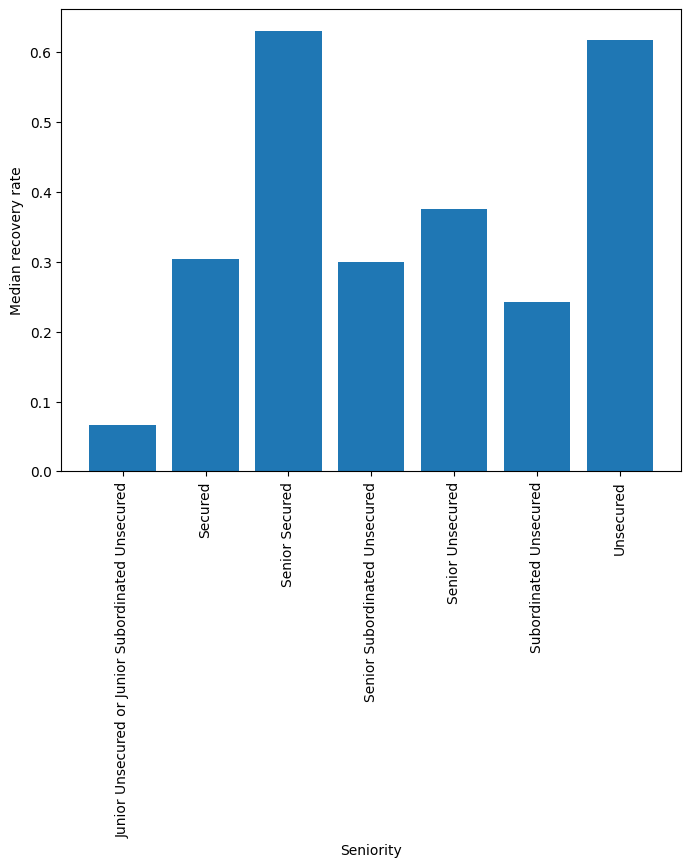

In [653]:
# Group by 'Category' and compute the median of 'Value'
median_df = sen['rr1_30'].median().reset_index()

# Plot the median values
plt.figure(figsize=(8, 6))
plt.bar(median_df['seniorioty_adj'], median_df['rr1_30'])
plt.xlabel('Seniority')
plt.ylabel('Median recovery rate')
# plt.title('Median Value by Category')
plt.xticks(rotation=90)
plt.show()

 SUMMARY STATISTICS OF RECOVERY RATE ACCORDING TO COUPON LEVEL

In [21]:
def categorize_coupon(rate: float):
  if math.isnan(rate):
    return rate
  return min(int(rate // 2.5) + 1, 5)

In [654]:
df_nonNA['coupon_category'] = df_nonNA['coupon rate'].apply(categorize_coupon)

In [655]:
cou = df_nonNA[['rr1_30', 'coupon_category']].groupby('coupon_category')
cou.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_30                                                    \
                 count      mean    median       std      skew       min   
coupon_category                                                            
1                  108  0.536297  0.467988  0.383764  0.065371  0.000010   
2                  232  0.470096  0.374042  0.350981  0.413679  0.011676   
3                  535  0.455764  0.405443  0.314795  0.404825  0.002567   
4                  556  0.507091  0.472497  0.324087  0.246284  0.007138   
5                  294  0.486434  0.376715  0.336986  0.379079  0.016667   

                                                       
                percentile_25 percentile_75       max  
coupon_category                                        
1                    0.153725      0.983880  1.077180  
2                    0.143375      0.827239  1.094128  
3                    0.170048      0.710144  1.091909  
4                    0.223293      0.808392  1.097605  
5                    0.198357      0.787452  1.099466

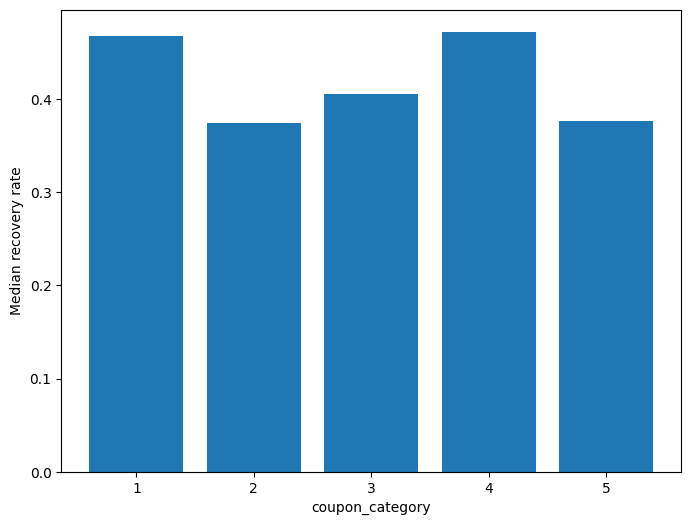

In [656]:
# Group by 'Category' and compute the median of 'Value'
median_df = cou['rr1_30'].median().reset_index()

# Plot the median values
plt.figure(figsize=(8, 6))
plt.bar(median_df['coupon_category'], median_df['rr1_30'])
plt.xlabel('coupon_category')
plt.ylabel('Median recovery rate')
# plt.title('Median Value by Category')
plt.show()

SUMMARY STATISTICS OF RECOVERY RATE ACCORDING TO MATURITY LEVEL

In [657]:
def categorize_duration(year: float):
    return min(int(year // 5) + 1, 5)

In [659]:
df_nonNA['duration_category'] = df_nonNA['duration_in_years'].apply(categorize_duration)

In [661]:
dur = df_nonNA[['rr1_7', 'rr1_30', 'duration_category']].groupby('duration_category')
dur.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_7                                                    \
                  count      mean    median       std      skew       min   
duration_category                                                           
1                   340  0.487476  0.410596  0.316091  0.398983  0.000688   
2                  1041  0.492960  0.450679  0.326116  0.278057  0.000010   
3                   192  0.557765  0.531747  0.361178  0.025362  0.013214   
4                    29  0.572331  0.592262  0.309256  0.030983  0.015000   
5                   123  0.374946  0.245794  0.315391  0.815732  0.015714   

                                                        rr1_30            \
                  percentile_25 percentile_75       max  count      mean   
duration_category                                                          
1                      0.207589      0.758851  1.127143    340  0.474453   
2                      0.190909      0.799763  1.132619   1041  0.486050   
3                      0.212885      0.872321  1.117753    192  0.554417   
4                      0.298274      0.792390  1.089596     29  0.560850   
5                      0.133434      0.588383  1.019194    123  0.372079   

                                                                         \
                     median       std      skew       min percentile_25   
duration_category                                                         
1                  0.381114  0.318856  0.459451  0.000690      0.202155   
2                  0.435738  0.328667  0.301718  0.000010      0.176054   
3                  0.532468  0.362679  0.035840  0.017125      0.217187   
4                  0.592171  0.315355  0.061854  0.015000      0.227880   
5                  0.243750  0.318125  0.835016  0.012895      0.122692   

                                           
                  percentile_75       max  
duration_category                          
1                      0.755568  1.095046  
2                      0.771905  1.097605  
3                      0.856104  1.099466  
4                      0.768374  1.091909  
5                      0.636083  1.014726

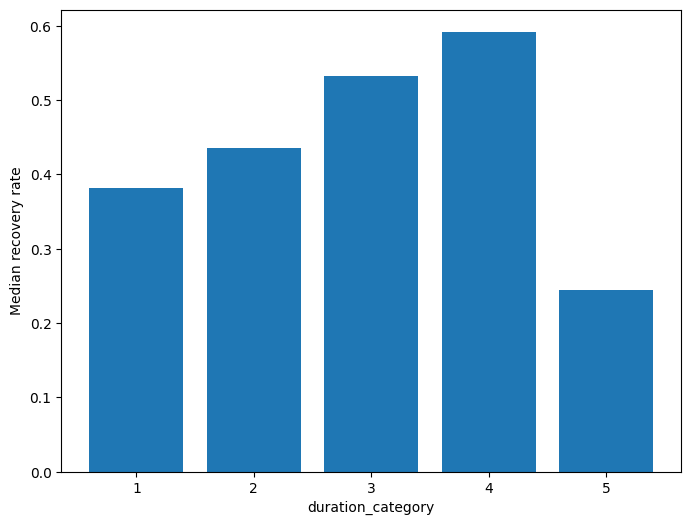

In [662]:
# Group by 'Category' and compute the median of 'Value'
median_df = dur['rr1_30'].median().reset_index()

# Plot the median values
plt.figure(figsize=(8, 6))
plt.bar(median_df['duration_category'], median_df['rr1_30'])
plt.xlabel('duration_category')
plt.ylabel('Median recovery rate')
# plt.title('Median Value by Category')
plt.show()

=> According to literature, recovery rate increases with maturity level

SUMMARY STATISTICS OF RECOVERY RATE ACCORDING TO DEFAULT TYPE

In [663]:
defa2 = df_nonNA[['rr1_30', 'event_type_subcategory_sum']].groupby('event_type_subcategory_sum')
defa2.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_30                                \
                                    count      mean    median       std   
event_type_subcategory_sum                                                
Bankruptcy                             28  0.418967  0.305767  0.359682   
Debt Restructuring                    738  0.489030  0.434976  0.320360   
Insolvency                             10  0.800611  0.957325  0.323990   
Liquidation                            10  0.733409  0.759387  0.280647   
Missing Coupon & principal payment    269  0.542832  0.489421  0.316770   
Missing Coupon payment only           323  0.372899  0.255250  0.305574   
Missing Interest payment               31  0.405028  0.226417  0.378092   
Missing Loan payment                   39  0.719019  0.835785  0.319661   
Missing Principal payment              29  0.400603  0.270792  0.322934   
Others                                191  0.508461  0.510554  0.358992   
Pre-Negotiated Chapter 11              26  0.548999  0.522600  0.304288   
Protection                              3  0.440858  0.160784  0.485365   
Receivership                            4  0.395549  0.308413  0.462168   
Rehabilitation                          7  0.989534  1.001561  0.085533   
Restructuring                          17  0.464112  0.460511  0.324547   

                                                                      \
                                        skew       min percentile_25   
event_type_subcategory_sum                                             
Bankruptcy                          0.789679  0.000100      0.150225   
Debt Restructuring                  0.289691  0.002567      0.199365   
Insolvency                         -1.200309  0.210042      0.647502   
Liquidation                        -0.442591  0.320518      0.545725   
Missing Coupon & principal payment  0.265278  0.011676      0.267833   
Missing Coupon payment only         0.799617  0.001377      0.130167   
Missing Interest payment            0.674446  0.005347      0.074542   
Missing Loan payment               -0.820977  0.000130      0.529615   
Missing Principal payment           1.183561  0.000690      0.164458   
Others                              0.159134  0.000010      0.119958   
Pre-Negotiated Chapter 11           0.125993  0.112667      0.283371   
Protection                          1.732050  0.160482      0.160633   
Receivership                        0.480864  0.012895      0.016505   
Rehabilitation                     -0.766346  0.848872      0.946438   
Restructuring                       0.497907  0.096758      0.156489   

                                                            
                                   percentile_75       max  
event_type_subcategory_sum                                  
Bankruptcy                              0.595305  1.075000  
Debt Restructuring                      0.766847  1.094128  
Insolvency                              1.007249  1.060038  
Liquidation                             1.002802  1.009924  
Missing Coupon & principal payment      0.869937  1.095046  
Missing Coupon payment only             0.629128  1.066918  
Missing Interest payment                0.734256  1.099466  
Missing Loan payment                    1.010468  1.091028  
Missing Principal payment               0.585790  1.065272  
Others                                  0.839196  1.097605  
Pre-Negotiated Chapter 11               0.834417  1.036457  
Protection                              0.581047  1.001309  
Receivership                            0.687457  0.952478  
Rehabilitation                          1.053123  1.077180  
Restructuring                           0.686496  1.043336

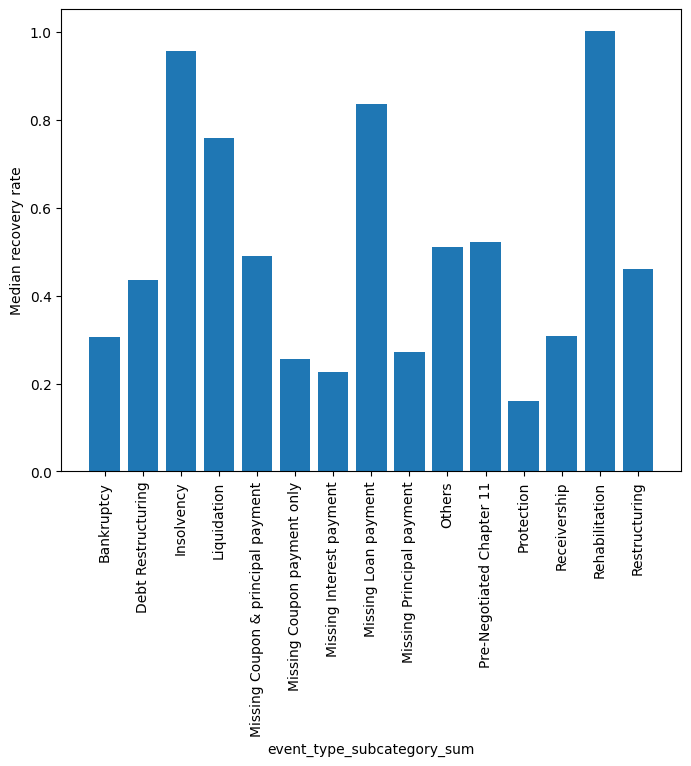

In [664]:
# Group by 'Category' and compute the median of 'Value'
median_df = defa2['rr1_30'].median().reset_index()

# Plot the median values
plt.figure(figsize=(8, 6))
plt.bar(median_df['event_type_subcategory_sum'], median_df['rr1_30'])
plt.xlabel('event_type_subcategory_sum')
plt.ylabel('Median recovery rate')
plt.xticks(rotation=90)
# plt.title('Median Value by Category')
plt.show()

SUMMARY STATISTICS OF RECOVERY RATES ACCORDING TO INDUSTRIAL SECTOR

In [665]:
defa = df_nonNA[['rr1_30', 'Industry_sector']].groupby('Industry_sector')
defa.agg(['count', 'mean', 'median', 'std', 'skew', 'min', percentile(0.25), percentile(0.75), 'max'])

rr1_30                                          \
                        count      mean    median       std      skew   
Industry_sector                                                         
Communications            144  0.478181  0.348753  0.358891  0.325178   
Consumer Discretionary    212  0.549220  0.525565  0.353884  0.035267   
Consumer Staples           58  0.595396  0.597724  0.356946 -0.239691   
Energy                    422  0.468375  0.417333  0.313916  0.389894   
Financials                 82  0.476021  0.373341  0.332629  0.559871   
Health Care                94  0.595581  0.658302  0.357832 -0.186147   
Industrials               129  0.557627  0.600540  0.328160 -0.148713   
Materials                 194  0.463083  0.442252  0.326510  0.319128   
Real Estate               248  0.345162  0.273958  0.249268  1.208051   
Technology                 94  0.433147  0.287356  0.336174  0.571998   
Utilities                  48  0.732998  0.827280  0.268772 -0.456617   

                                                                        
                             min percentile_25 percentile_75       max  
Industry_sector                                                         
Communications          0.000690      0.142764      0.857404  1.074331  
Consumer Discretionary  0.002567      0.226417      0.872719  1.095046  
Consumer Staples        0.000100      0.317866      0.941471  1.075000  
Energy                  0.011676      0.174331      0.684028  1.070875  
Financials              0.012895      0.237599      0.661673  1.099466  
Health Care             0.000010      0.212133      0.975051  1.097605  
Industrials             0.000130      0.280525      0.835724  1.091028  
Materials               0.001377      0.158674      0.740152  1.076444  
Real Estate             0.030250      0.163365      0.450134  1.056134  
Technology              0.010109      0.165068      0.723708  1.086562  
Utilities               0.080328      0.497552      0.923779  1.094128

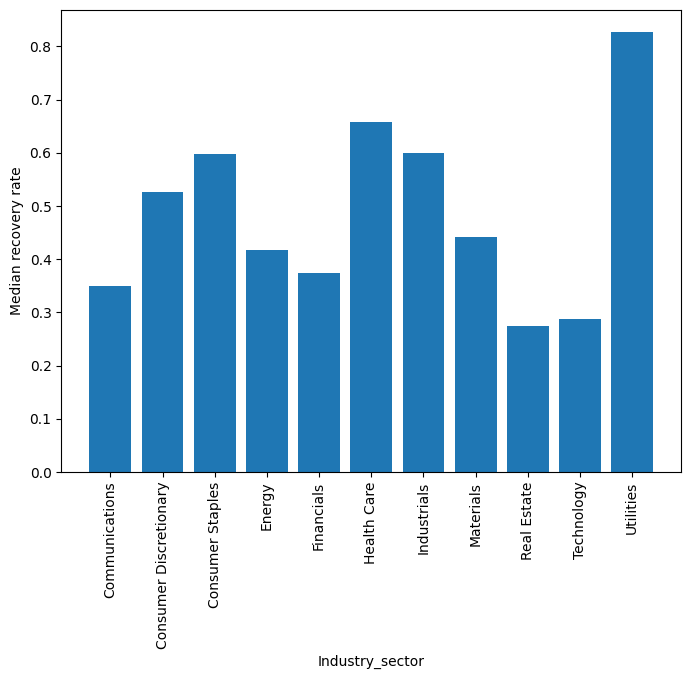

In [666]:
# Group by 'Category' and compute the median of 'Value'
median_df = defa['rr1_30'].median().reset_index()

# Plot the median values
plt.figure(figsize=(8, 6))
plt.bar(median_df['Industry_sector'], median_df['rr1_30'])
plt.xlabel('Industry_sector')
plt.ylabel('Median recovery rate')
# plt.title('Median Value by Category')
plt.xticks(rotation=90)
plt.show()

INTERATION AND OUTLIER ANALYSIS

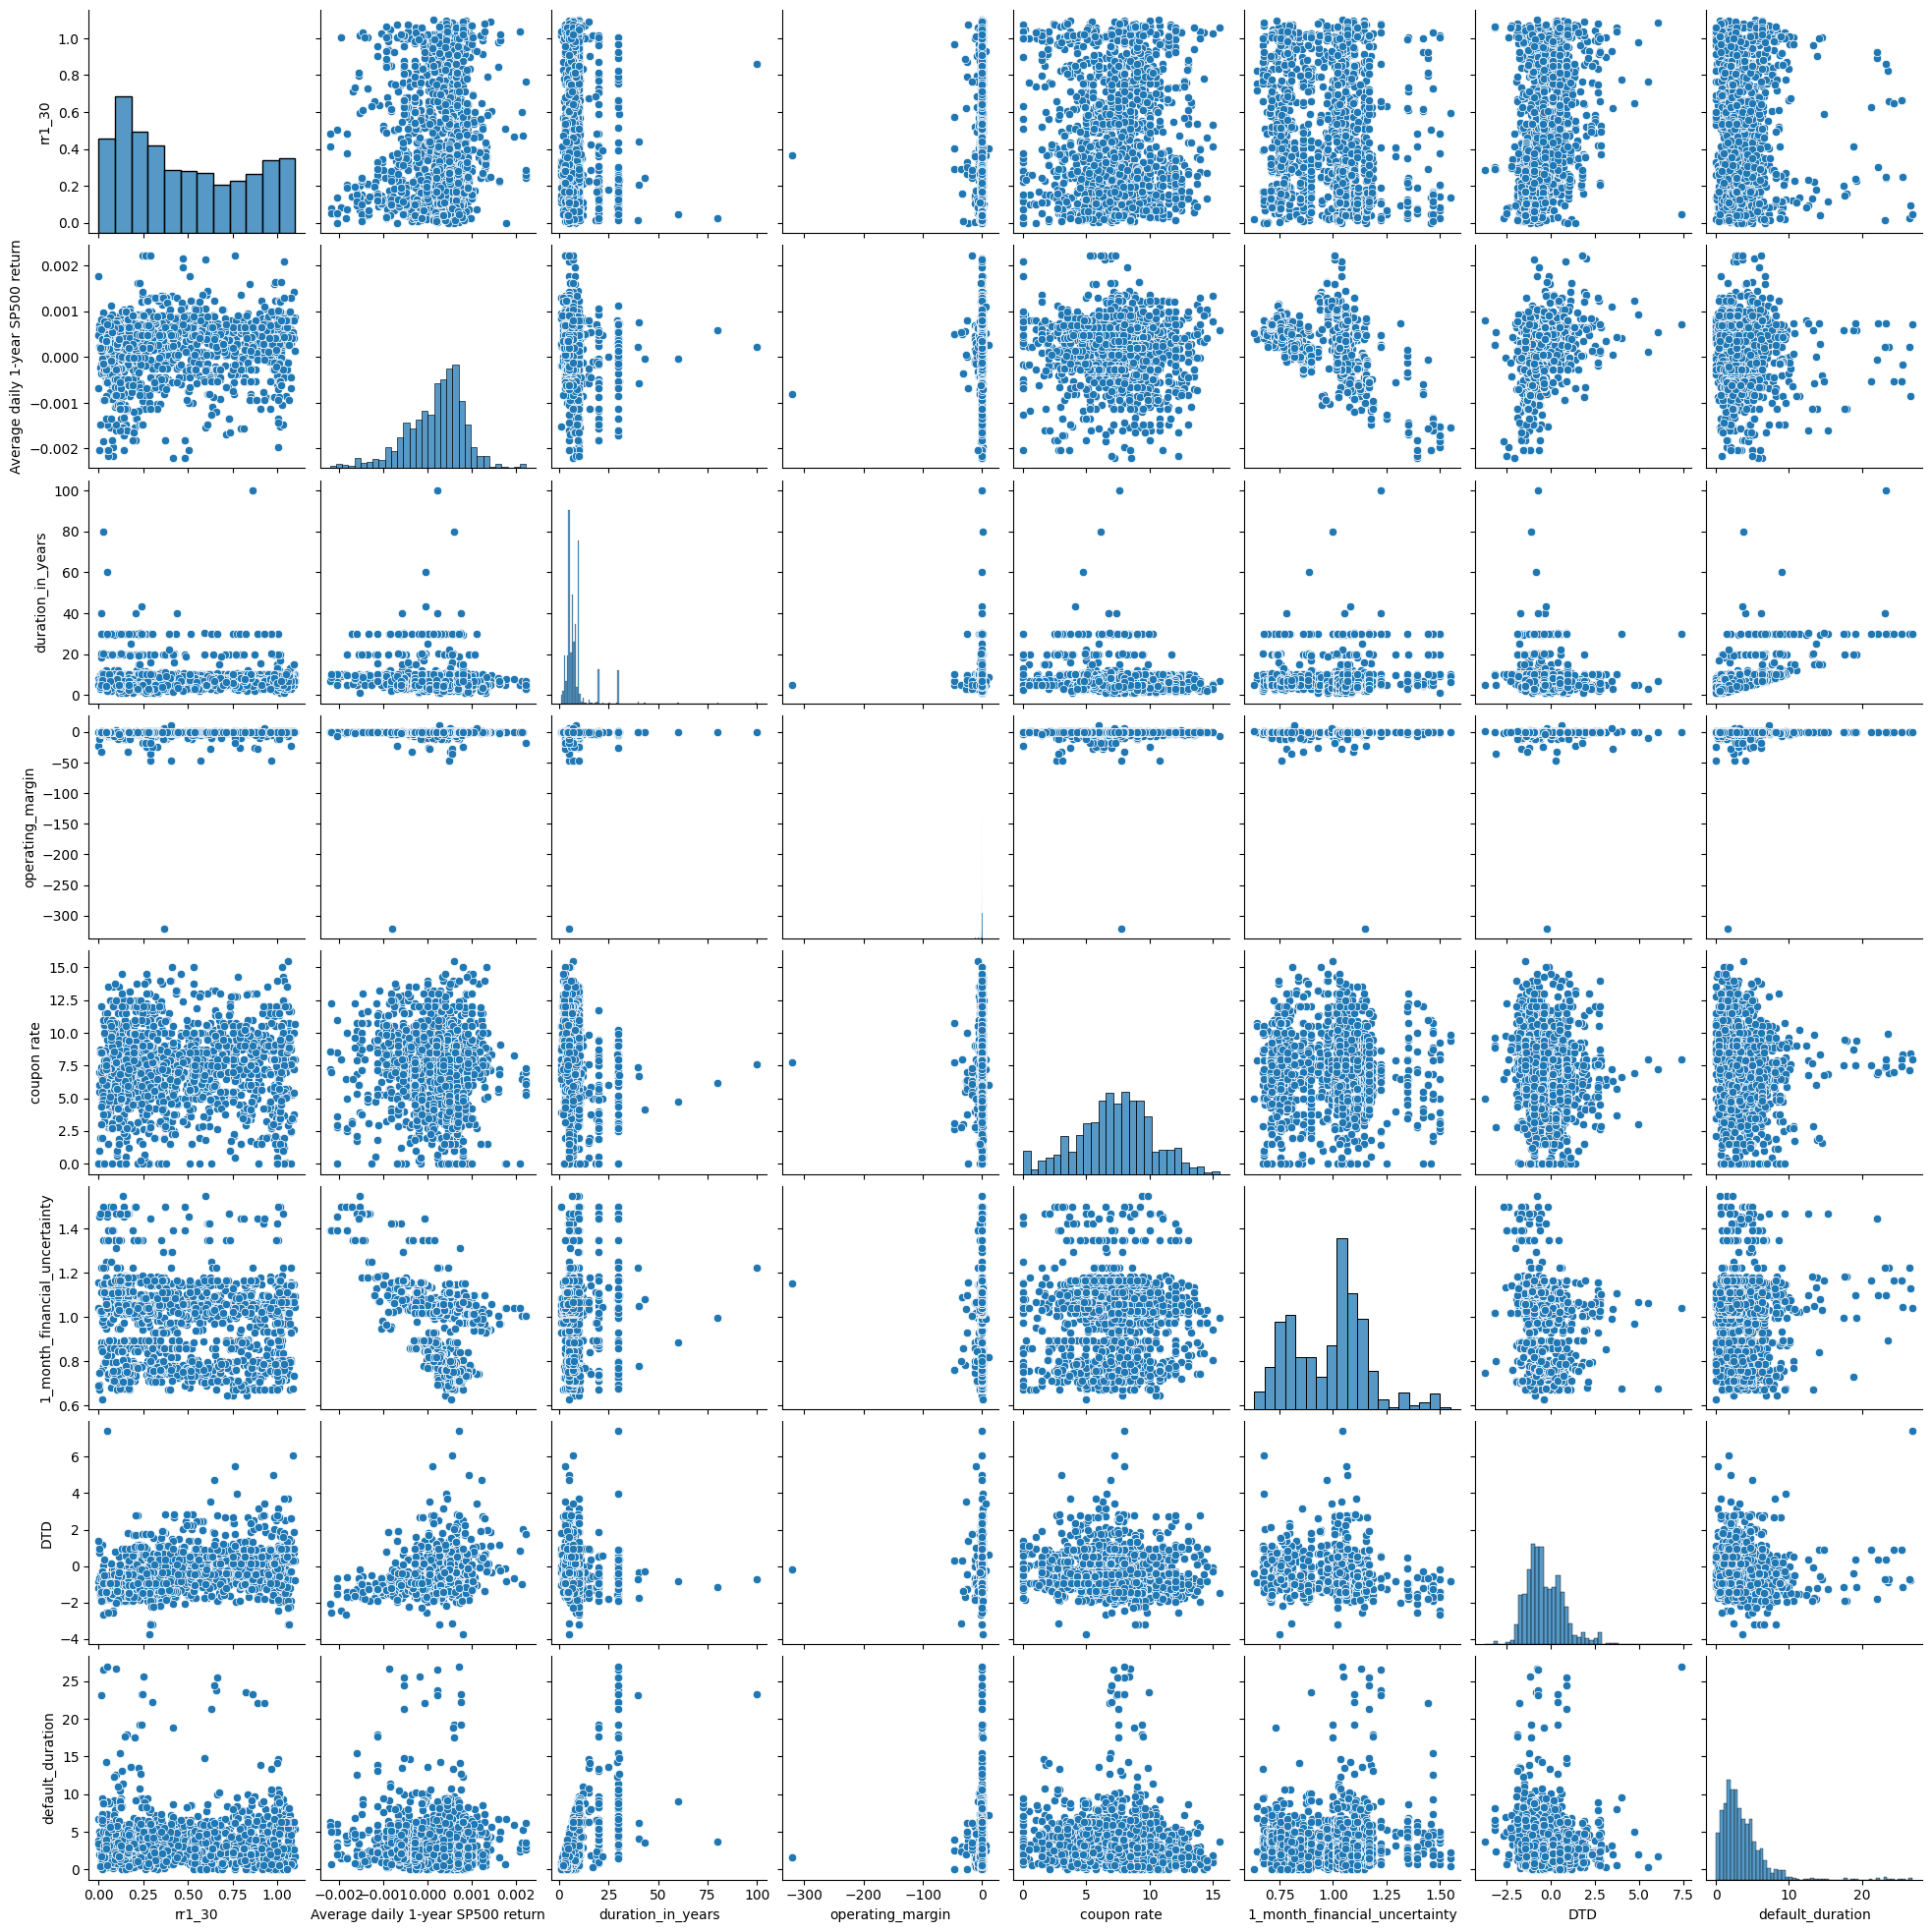

In [130]:
# pairwise graphs
# sns.reset_defaults()
sns.pairplot(df_nonNA[['rr1_30', 'Average daily 1-year SP500 return', 'duration_in_years', 'operating_margin', 'coupon rate', '1_month_financial_uncertainty', 'DTD', 'default_duration']])
plt.show()

=> duration in years, DTD amd default_duration seem to have big univariate outliers <br>
=> seems like there is no bivariate outliers

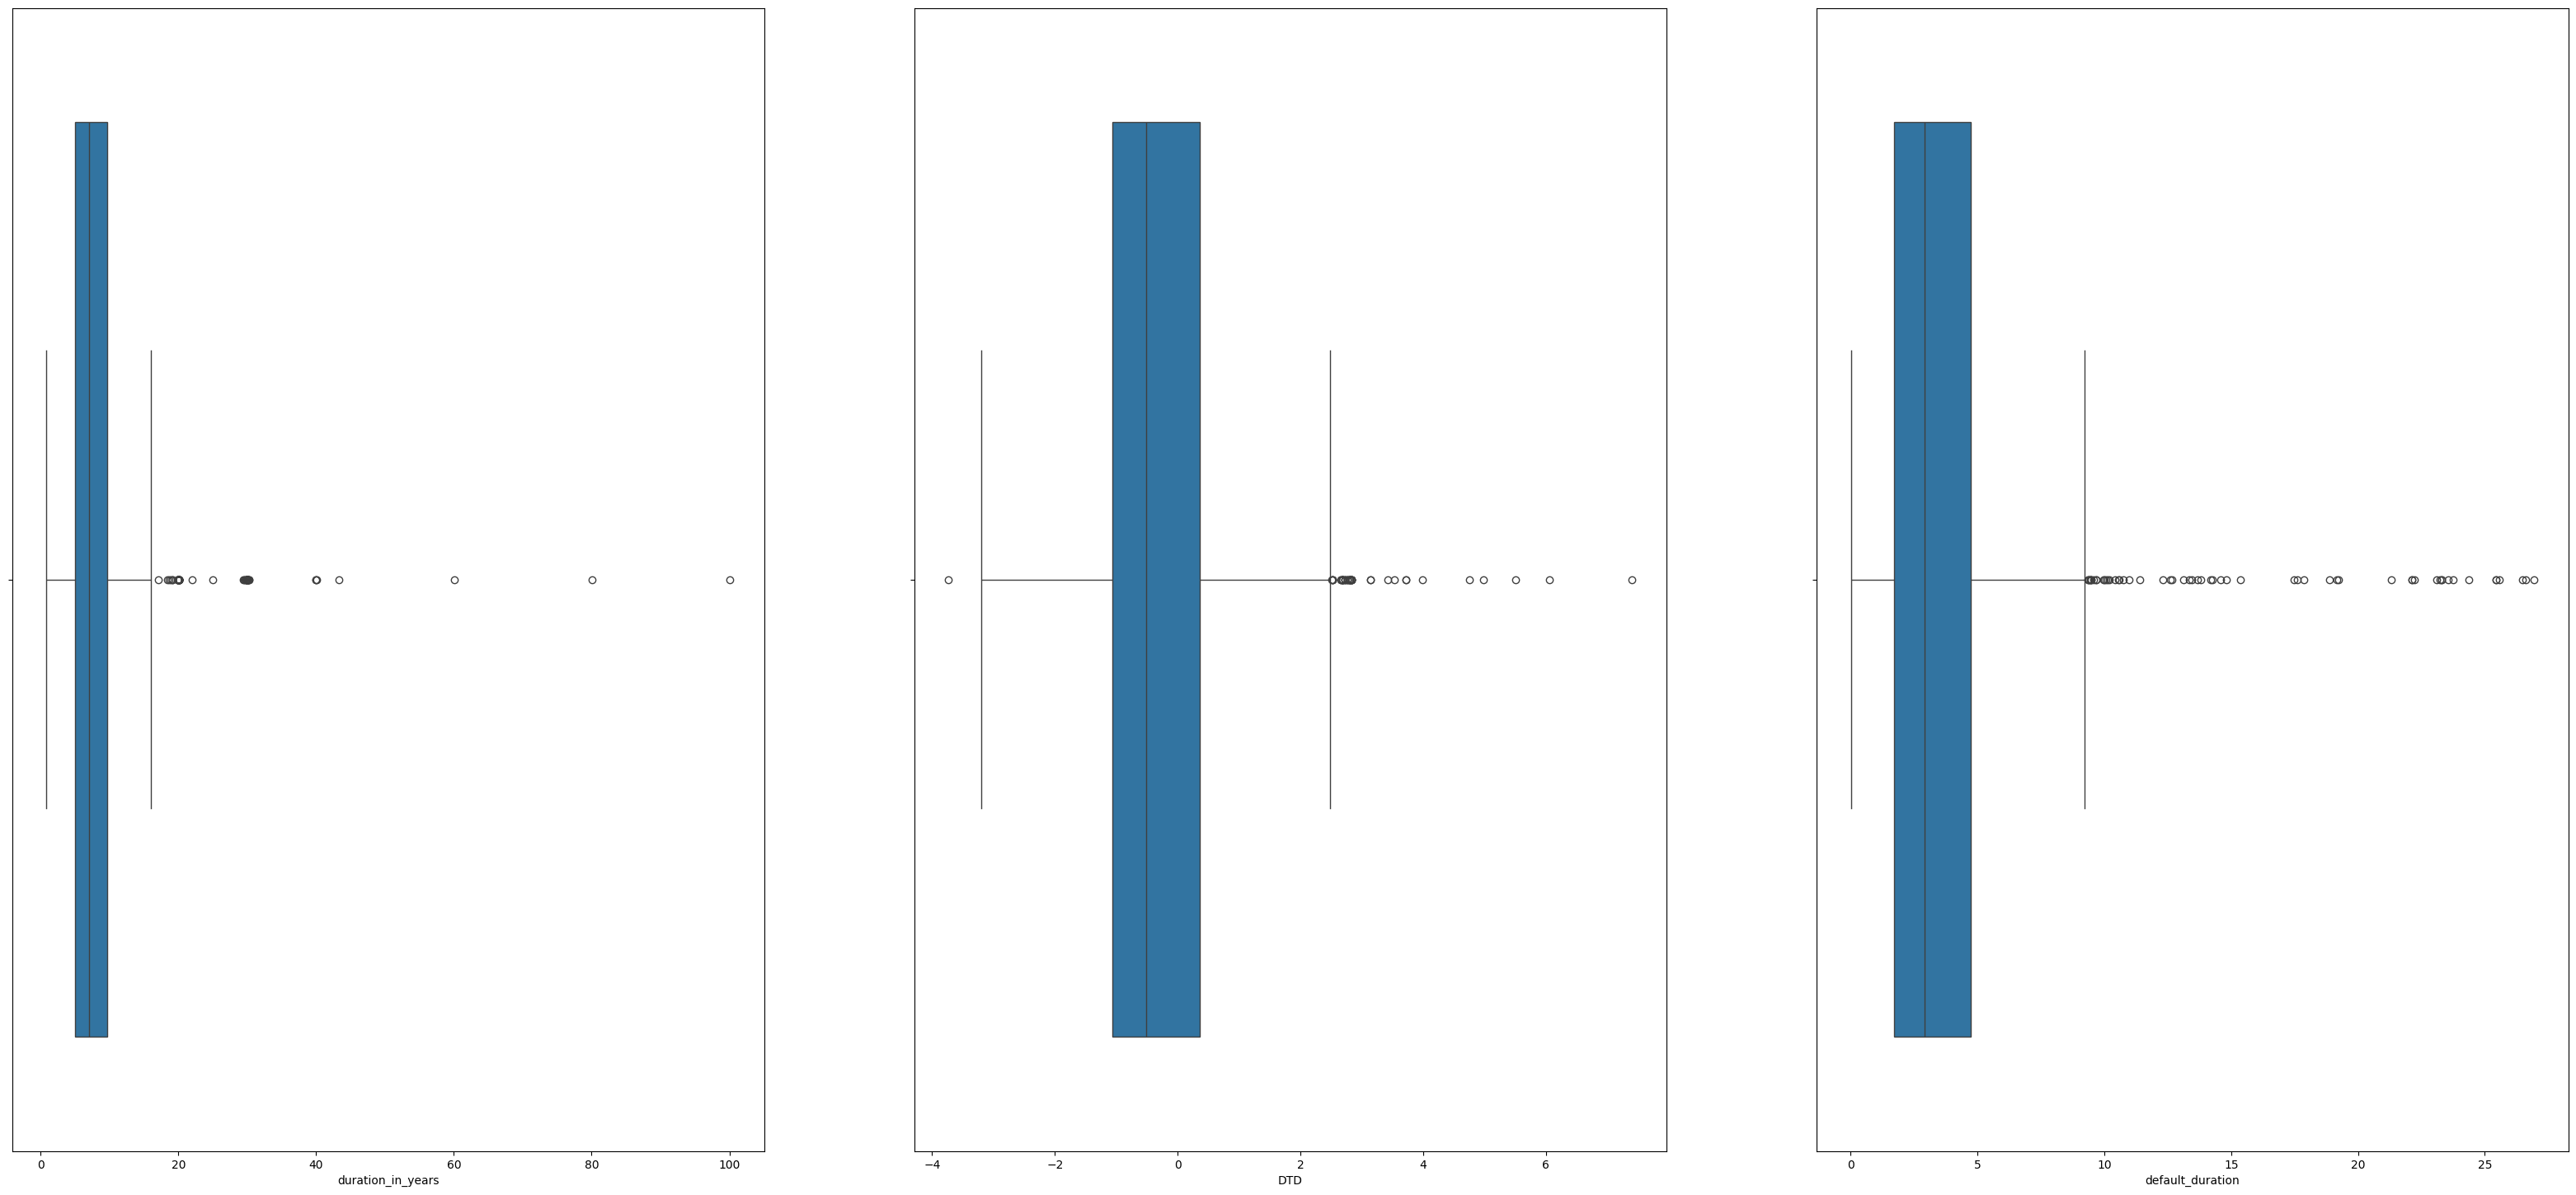

In [134]:
# plot outliers of duration in years
fig, ax = plt.subplots(1, 3, figsize=(40,18))
sns.boxplot(data=df_nonNA, x="duration_in_years", ax=ax[0])
sns.boxplot(data=df_nonNA, x="DTD", ax=ax[1])
sns.boxplot(data=df_nonNA, x="default_duration", ax=ax[2])
plt.show()

CORRELATION

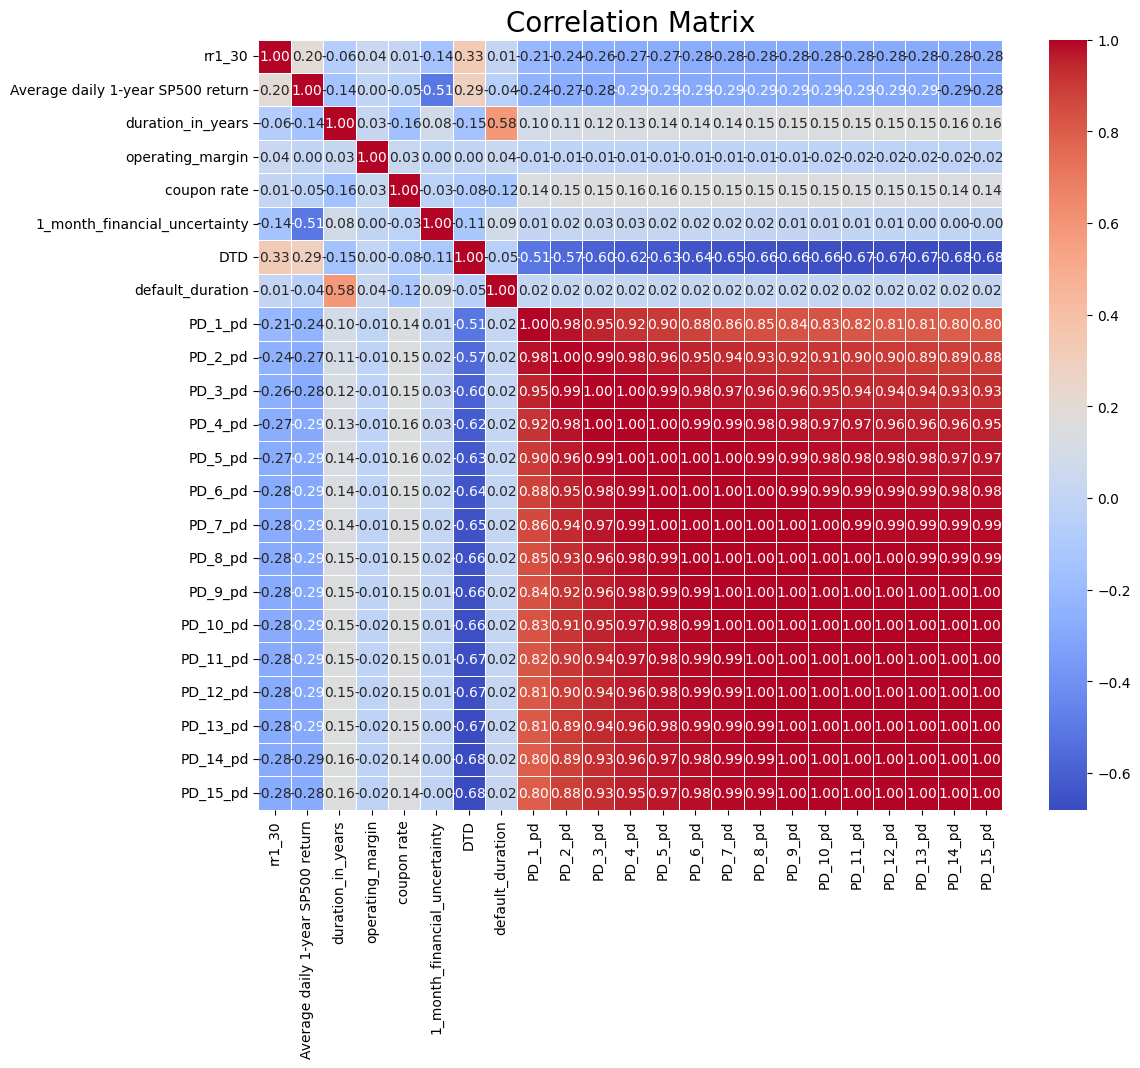

In [138]:
# correlation matrix
correlation_matrix = df_nonNA[['rr1_30', 'Average daily 1-year SP500 return', 'duration_in_years', 'operating_margin', 'coupon rate', '1_month_financial_uncertainty', 'DTD', 'default_duration','PD_1_pd', 'PD_2_pd', 'PD_3_pd', 'PD_4_pd', 'PD_5_pd', 'PD_6_pd', 'PD_7_pd', 'PD_8_pd', 'PD_9_pd',  'PD_10_pd', 'PD_11_pd', 'PD_12_pd', 'PD_13_pd', 'PD_14_pd', 'PD_15_pd']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True)

# Adjustments for aesthetics
plt.title('Correlation Matrix', fontsize=20)
plt.show()

=> PDs are highly correlated. DTD is highly correlated to PD

MULTIVATE OUTLIER ANALYSIS

In [39]:
from scipy.spatial.distance import mahalanobis
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [670]:
df_nonNA.dtypes

rr1_7                         float64
rr2_7                         float64
rr1_30                        float64
rr2_30                        float64
currency                       object
                               ...   
Size                          float64
defaulted_in_last_6_months     object
default_duration              float64
coupon_category                 int64
duration_category               int64
Length: 181, dtype: object

In [674]:
# Mahalanobis distance - can only apply to numerical features

# standardize all features
scaler = StandardScaler()
std_num_features = df_nonNA.copy()
std_num_features[numeric_features] = scaler.fit_transform(df_nonNA[numeric_features])

# calculate mean, variance, inverse cov 
mean = std_num_features[numeric_features].mean()
cov = std_num_features[numeric_features].cov()
inv_cov = np.linalg.inv(cov)

# calculate distance
std_num_features['mahalabonis_distance'] = std_num_features[numeric_features].apply(lambda x: mahalanobis(x, mean, inv_cov), axis=1)
std_num_features.head()

/var/folders/gc/mln0kg89025flmz65rqz4qn40000gn/T/ipykernel_60897/3969579059.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  std_num_features['mahalabonis_distance'] = std_num_features[numeric_features].apply(lambda x: mahalanobis(x, mean, inv_cov), axis=1)


rr1_7     rr2_7    rr1_30    rr2_30 currency  \
23  0.247786  0.241969  0.259908  0.252843      USD   
25  0.030148  0.029552  0.032729  0.031998      USD   
26  0.969841  0.960390  0.972400  0.960490      USD   
27  1.047361  1.046199  1.047416  1.046196      CHF   
28  0.848102  0.840452  0.848872  0.840574      JPY   

                       seniorioty                 seniorioty_adj  coupon rate  \
23  Senior Subordinated Unsecured  Senior Subordinated Unsecured     0.597271   
25  Senior Subordinated Unsecured  Senior Subordinated Unsecured    -0.503045   
26                      Unsecured                      Unsecured    -0.528437   
27                      Unsecured                      Unsecured    -2.407440   
28                      Unsecured                      Unsecured    -1.857281   

   coupon frequency maturity_type call type put type  Convertible  \
23              2.0     CALL/SINK        NA       NA           NA   
25              2.0     CONV/CALL        NA       NA  Convertible   
26              2.0       PUTABLE        NA       NA           NA   
27              1.0   CONVERTIBLE        NA       NA  Convertible   
28              1.0     CONV/CALL        NA       NA           NA   

   coupon type -code domicile_country exchange_country  \
23              FXPV    United States    United States   
25              FXPV    United States    United States   
26              FRPV      South Korea      South Korea   
27              FXPV      South Korea      South Korea   
28              FXPV            Japan            Japan   

           Industry_sector                  Industry_group  \
23  Consumer Discretionary  Retail & Whsle - Discretionary   
25             Health Care                     Health Care   
26  Consumer Discretionary  Retail & Whsle - Discretionary   
27  Consumer Discretionary  Retail & Whsle - Discretionary   
28             Industrials             Industrial Products   

                Industry_subgroup           event_type  \
23       E-Commerce Discretionary    Bankruptcy Filing   
25  Health Care Facilities & Svcs  Default Corp Action   
26      Wholesale - Discretionary  Default Corp Action   
27      Wholesale - Discretionary  Default Corp Action   
28           Electrical Equipment    Bankruptcy Filing   

          event_type_subcategory   event_type_subcategory_sum  \
23       Filing Type: Chapter 11           Debt Restructuring   
25   Reason: Coupon payment only  Missing Coupon payment only   
26      Reason: Interest payment     Missing Interest payment   
27      Reason: Interest payment     Missing Interest payment   
28   Filing Type: Rehabilitation               Rehabilitation   

              exit_type         exit_type_subcategory  SP500 MD  \
23    Bankruptcy Filing       Filing Type: Chapter 11  0.529385   
25  Default Corp Action   Reason: Coupon payment only  0.135977   
26  Default Corp Action      Reason: Interest payment  0.230479   
27  Default Corp Action      Reason: Interest payment  0.230479   
28    Bankruptcy Filing   Filing Type: Rehabilitation -0.145104   

    Average daily 1-year SP500 return  Ratio to MA  \
23                           1.004177    -0.010605   
25                           1.118090     0.000841   
26                           1.115759    -0.010789   
27                           1.115759    -0.010789   
28                           0.427499    -0.110875   

    US Corporate Bond Yield Spread  US Corporate Bond Yield Spread(3-5 year)  \
23                       -0.395819                                 -0.306017   
25                       -1.861448                                 -0.202608   
26                       -0.274626                                 -0.202608   
27                       -0.274626                                 -0.202608   
28                        0.160786                                  0.074423   

    US Corporate Bond Yield Spread(5-7 year)  \
23                                 -0.453299   
25     

Text(0.5, 1.0, 'Outlier analysis of Mahalabonis distance')

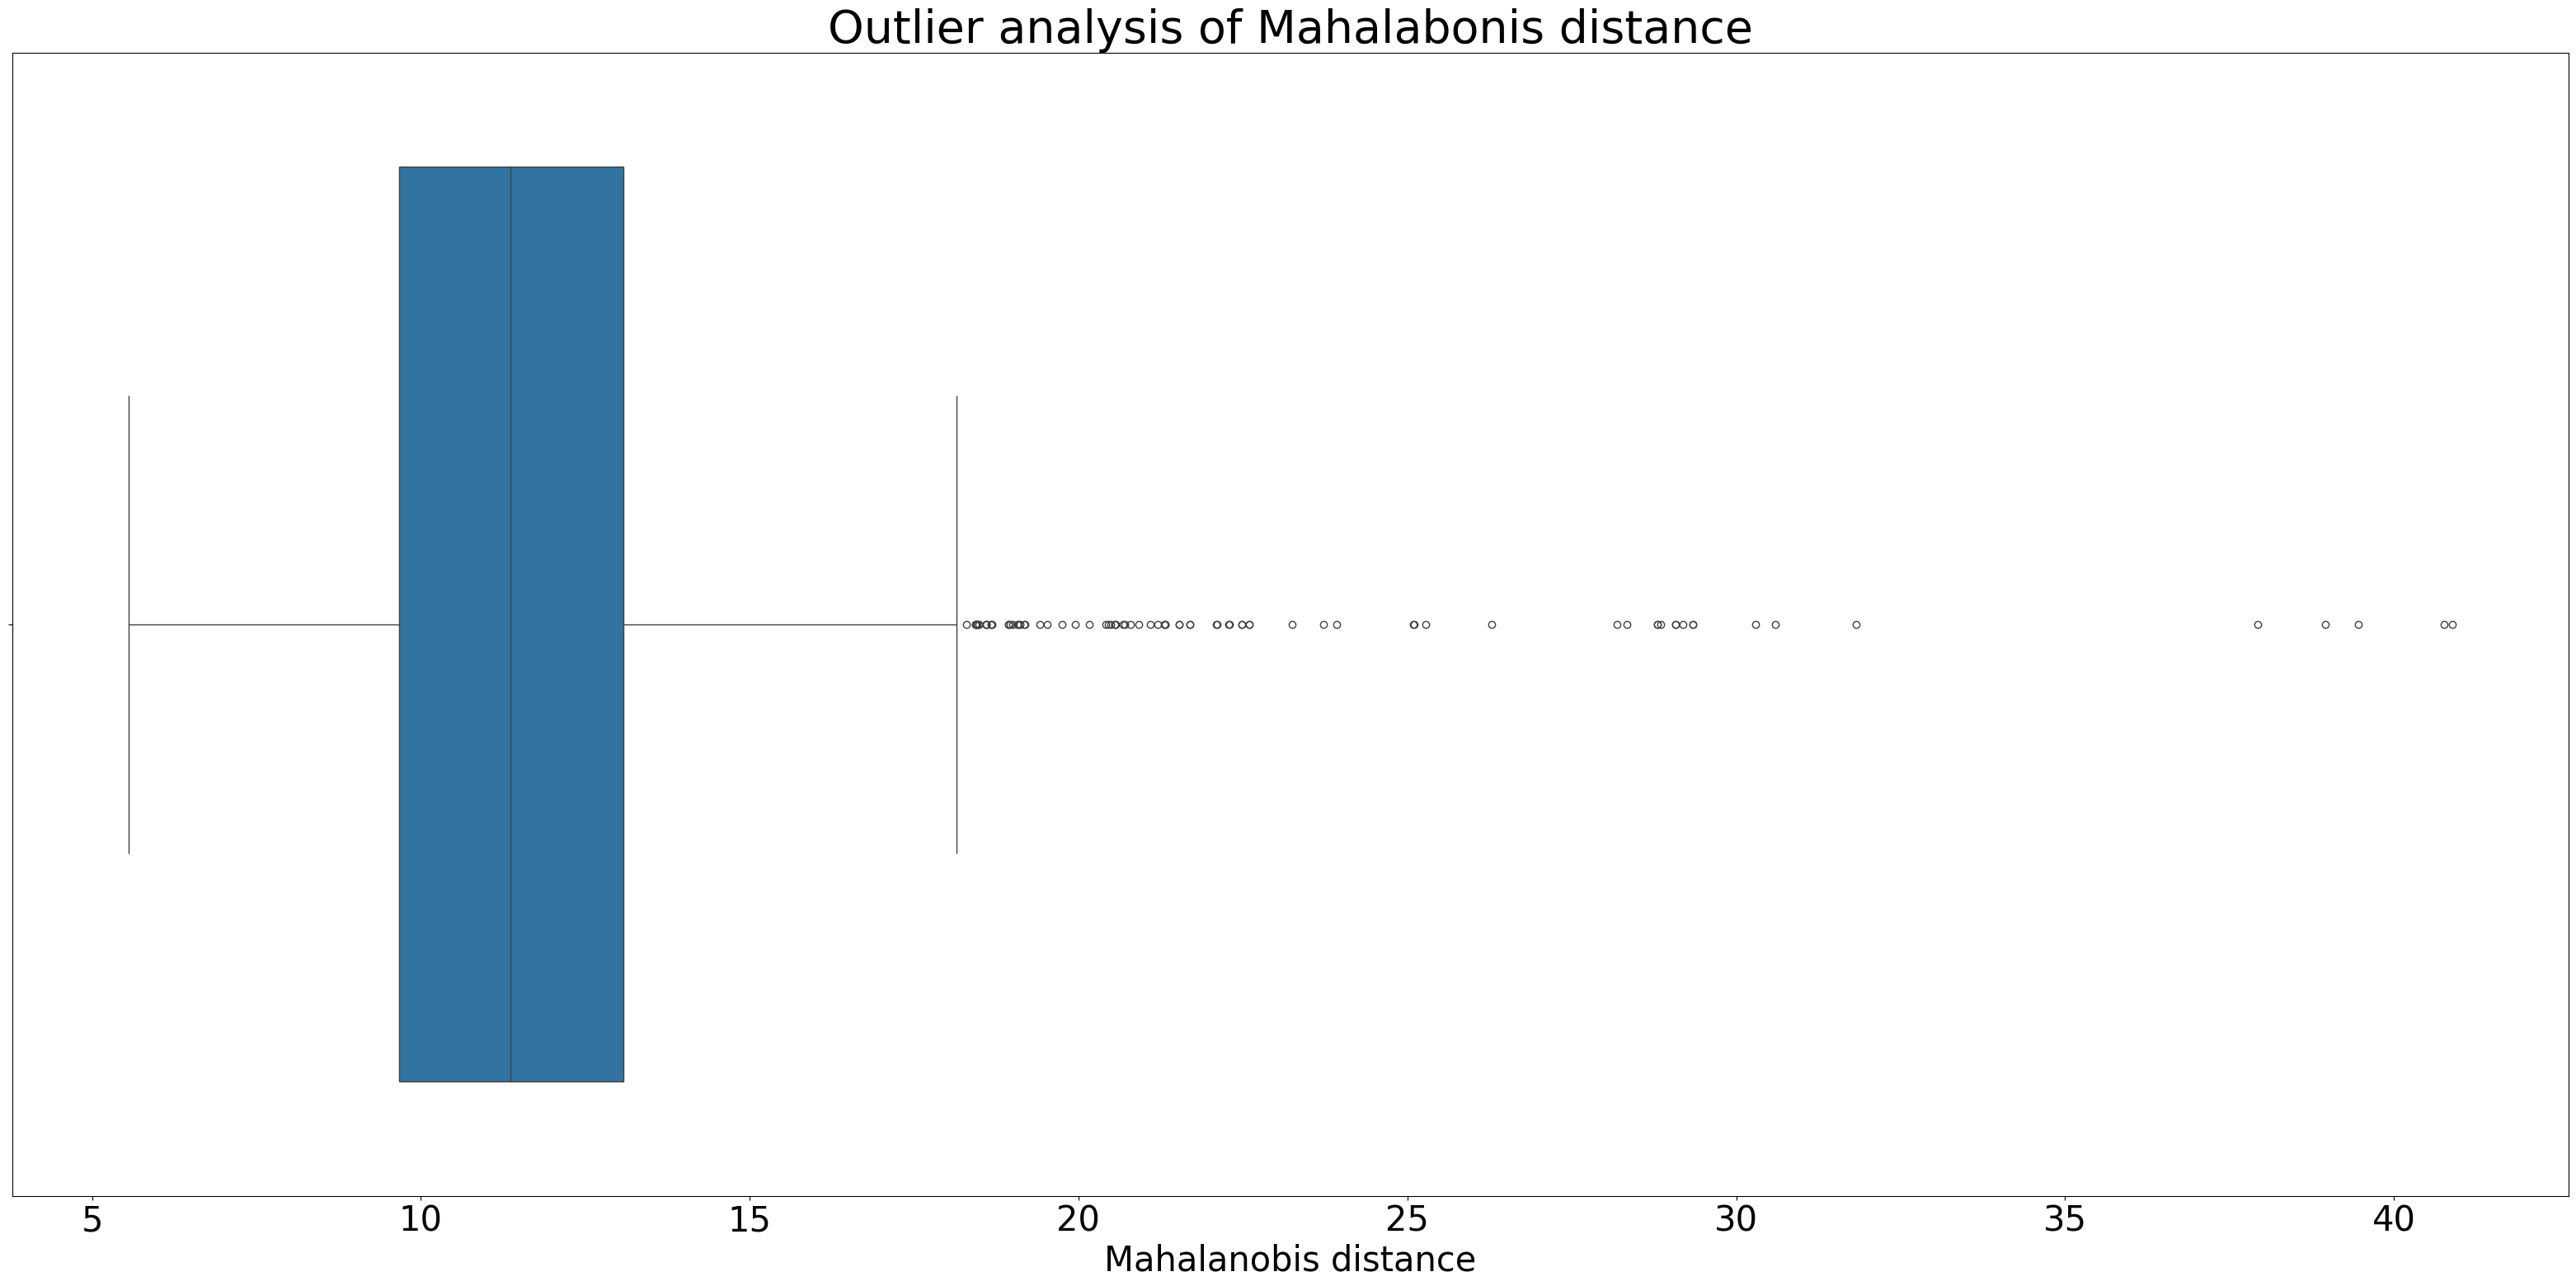

In [675]:
plt.figure(figsize=(40, 18))

ax = sns.boxplot(std_num_features, x='mahalabonis_distance')
ax.set_xlabel('Mahalanobis distance', fontsize=30)
plt.xticks(fontsize=30)
ax.set_title('Outlier analysis of Mahalabonis distance', fontsize = 40)

In [78]:
# print out rows where there is outlier
multi_outliers = std_num_features[std_num_features['mahalabonis_distance'] >= 20]
multi_outliers.sort_values(ascending=False, by='mahalabonis_distance')

rr1_7     rr2_7    rr1_30    rr2_30 currency  \
850   0.756584  0.755387  0.740940  0.737014      USD   
1775  0.278571  0.270950  0.266333  0.258218      USD   
138   0.157786  0.151418  0.120050  0.117326      USD   
1032  0.786908  0.762576  0.771905  0.745329      USD   
182   0.399279  0.396295  0.364026  0.360110      USD   
232   0.582155  0.581007  0.324288  0.322541      USD   
2009  1.056201  1.012287  1.060038  1.012242      INR   
443   0.351628  0.335294  0.332541  0.322563      USD   
439   0.084137  0.081137  0.083369  0.080389      USD   
1302  0.848206  0.835975  0.749283  0.736045      USD   
1301  0.799672  0.772341  0.696979  0.686740      USD   
25    0.030148  0.029552  0.032729  0.031998      USD   
1067  0.314216  0.309150  0.169664  0.168091      USD   
1068  0.314245  0.309169  0.169587  0.168012      USD   
516   0.453333  0.451827  0.421644  0.419543      USD   
956   0.275926  0.272025  0.219682  0.217973      USD   
955   0.199319  0.196524  0.200077  0.198632      USD   
664   0.282996  0.280751  0.285139  0.282275      USD   
1040  0.402095  0.401254  0.402250  0.401346      USD   
1116  0.320917  0.315783  0.351303  0.344823      USD   
2072  0.066853  0.064477  0.047666  0.046553      CAD   
630   0.999880  1.000000  0.999880  1.000000      NOK   
631   1.003518  1.003701  1.003518  1.003701      NOK   
1384  0.668214  0.656082  0.863167  0.842303      USD   
352   1.015288  1.002188  1.016556  1.001723      SGD   
1251  0.104622  0.104141  0.105916  0.105293      USD   
255   0.416270  0.415466  0.389916  0.387414      USD   
1187  0.301249  0.297478  0.290396  0.288221      USD   
1044  0.567000  0.545084  0.514050  0.502097      USD   
648   0.270792  0.270335  0.284689  0.282901      CNY   
1345  0.092857  0.090975  0.096667  0.094434      USD   
357   1.000579  0.997508  1.004122  0.997516      USD   
388   0.040750  0.040719  0.051195  0.050989      USD   
356   0.082722  0.082465  0.082331  0.081786      USD   
387   0.076560  0.074685  0.081266  0.078853      USD   
874   0.157298  0.156081  0.160784  0.158984      SGD   
876   0.158494  0.157113  0.160482  0.158715      SGD   
50    0.222000  0.212472  0.202750  0.193184      USD   
385   0.487636  0.479185  0.416090  0.407847      USD   
386   0.479548  0.469777  0.483228  0.471678      USD   
330   0.283409  0.280748  0.285604  0.282010      USD   
364   0.144307  0.144094  0.138611  0.137890      USD   
392   0.101429  0.101283  0.072583  0.072210      USD   
98    0.142090  0.141813  0.153808  0.152609      USD   
455   1.025714  1.025714  1.038000  1.038000      USD   
456   1.027143  1.027143  1.036000  1.036000      USD   
55    0.631653  0.612272  0.637578  0.614480      USD   
341   0.766690  0.765097  0.924683  0.917545      USD   
329   0.008300  0.008299  0.008300  0.008299      MYR   
1176  0.358720  0.348341  0.342989  0.331891      USD   
1177  0.357445  0.347231  0.343949  0.332925      USD   
391   0.182222  0.182011  0.188222  0.187107      USD   
365   0.000688  0.000688  0.000690  0.000690      MYR   
521   0.279071  0.278335  0.257406  0.256237      USD   

                                         seniorioty_adj  coupon rate  \
850                                      Senior Secured     0.525806   
1775                                   Senior Unsecured     0.086723   
138                                           Unsecured     0.568853   
1032                                     Senior Secured     0.525806   
182                              Subordinated Unsecured     0.138380   
232                                    Senior Unsecured     0.870185   
2009                                     Senior Secured     0.465540   
443                                      Senior Secured     1.257611   
439   Junior Unsecured or Junior Subordinated Unsecured     0.565410   
1302                                   Senior Unsecured     0.224475   
1301                                   Senior Unsecured     0.052285   
25       

<Axes: xlabel='rr1_30', ylabel='Count'>

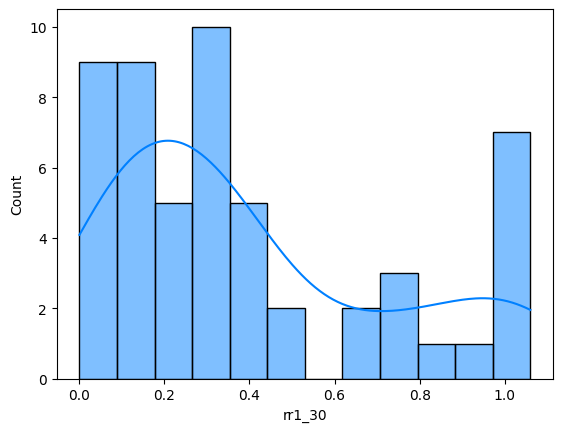

In [676]:
# recovery rates of outliers
# looks like most of outliers are at each end of this recovery distribution
# so it seems like this is nature of data
sns.histplot(multi_outliers['rr1_30'], kde=True, bins=12, color=(0, 0.5, 1))

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) to identify multivariate outliers - 
Can only apply to numerical features

In [682]:
# Nearest neighbors

# number of neighbors = 2 include the datapoint itself => only find 1 nearest neighbor
knn = NearestNeighbors(n_neighbors=2)
nbrs = knn.fit(std_num_features[numeric_features])
distances, indices = nbrs.kneighbors(std_num_features[numeric_features])

# distances has shape (n_samples, n_neighbors)
distances = np.sort(distances, axis=0)

# select the distance for each neighbor
distances = distances[:,1]

In [732]:
distances

array([ 0.        ,  0.        ,  0.        , ..., 30.77695356,
       33.28564907, 35.77932872])

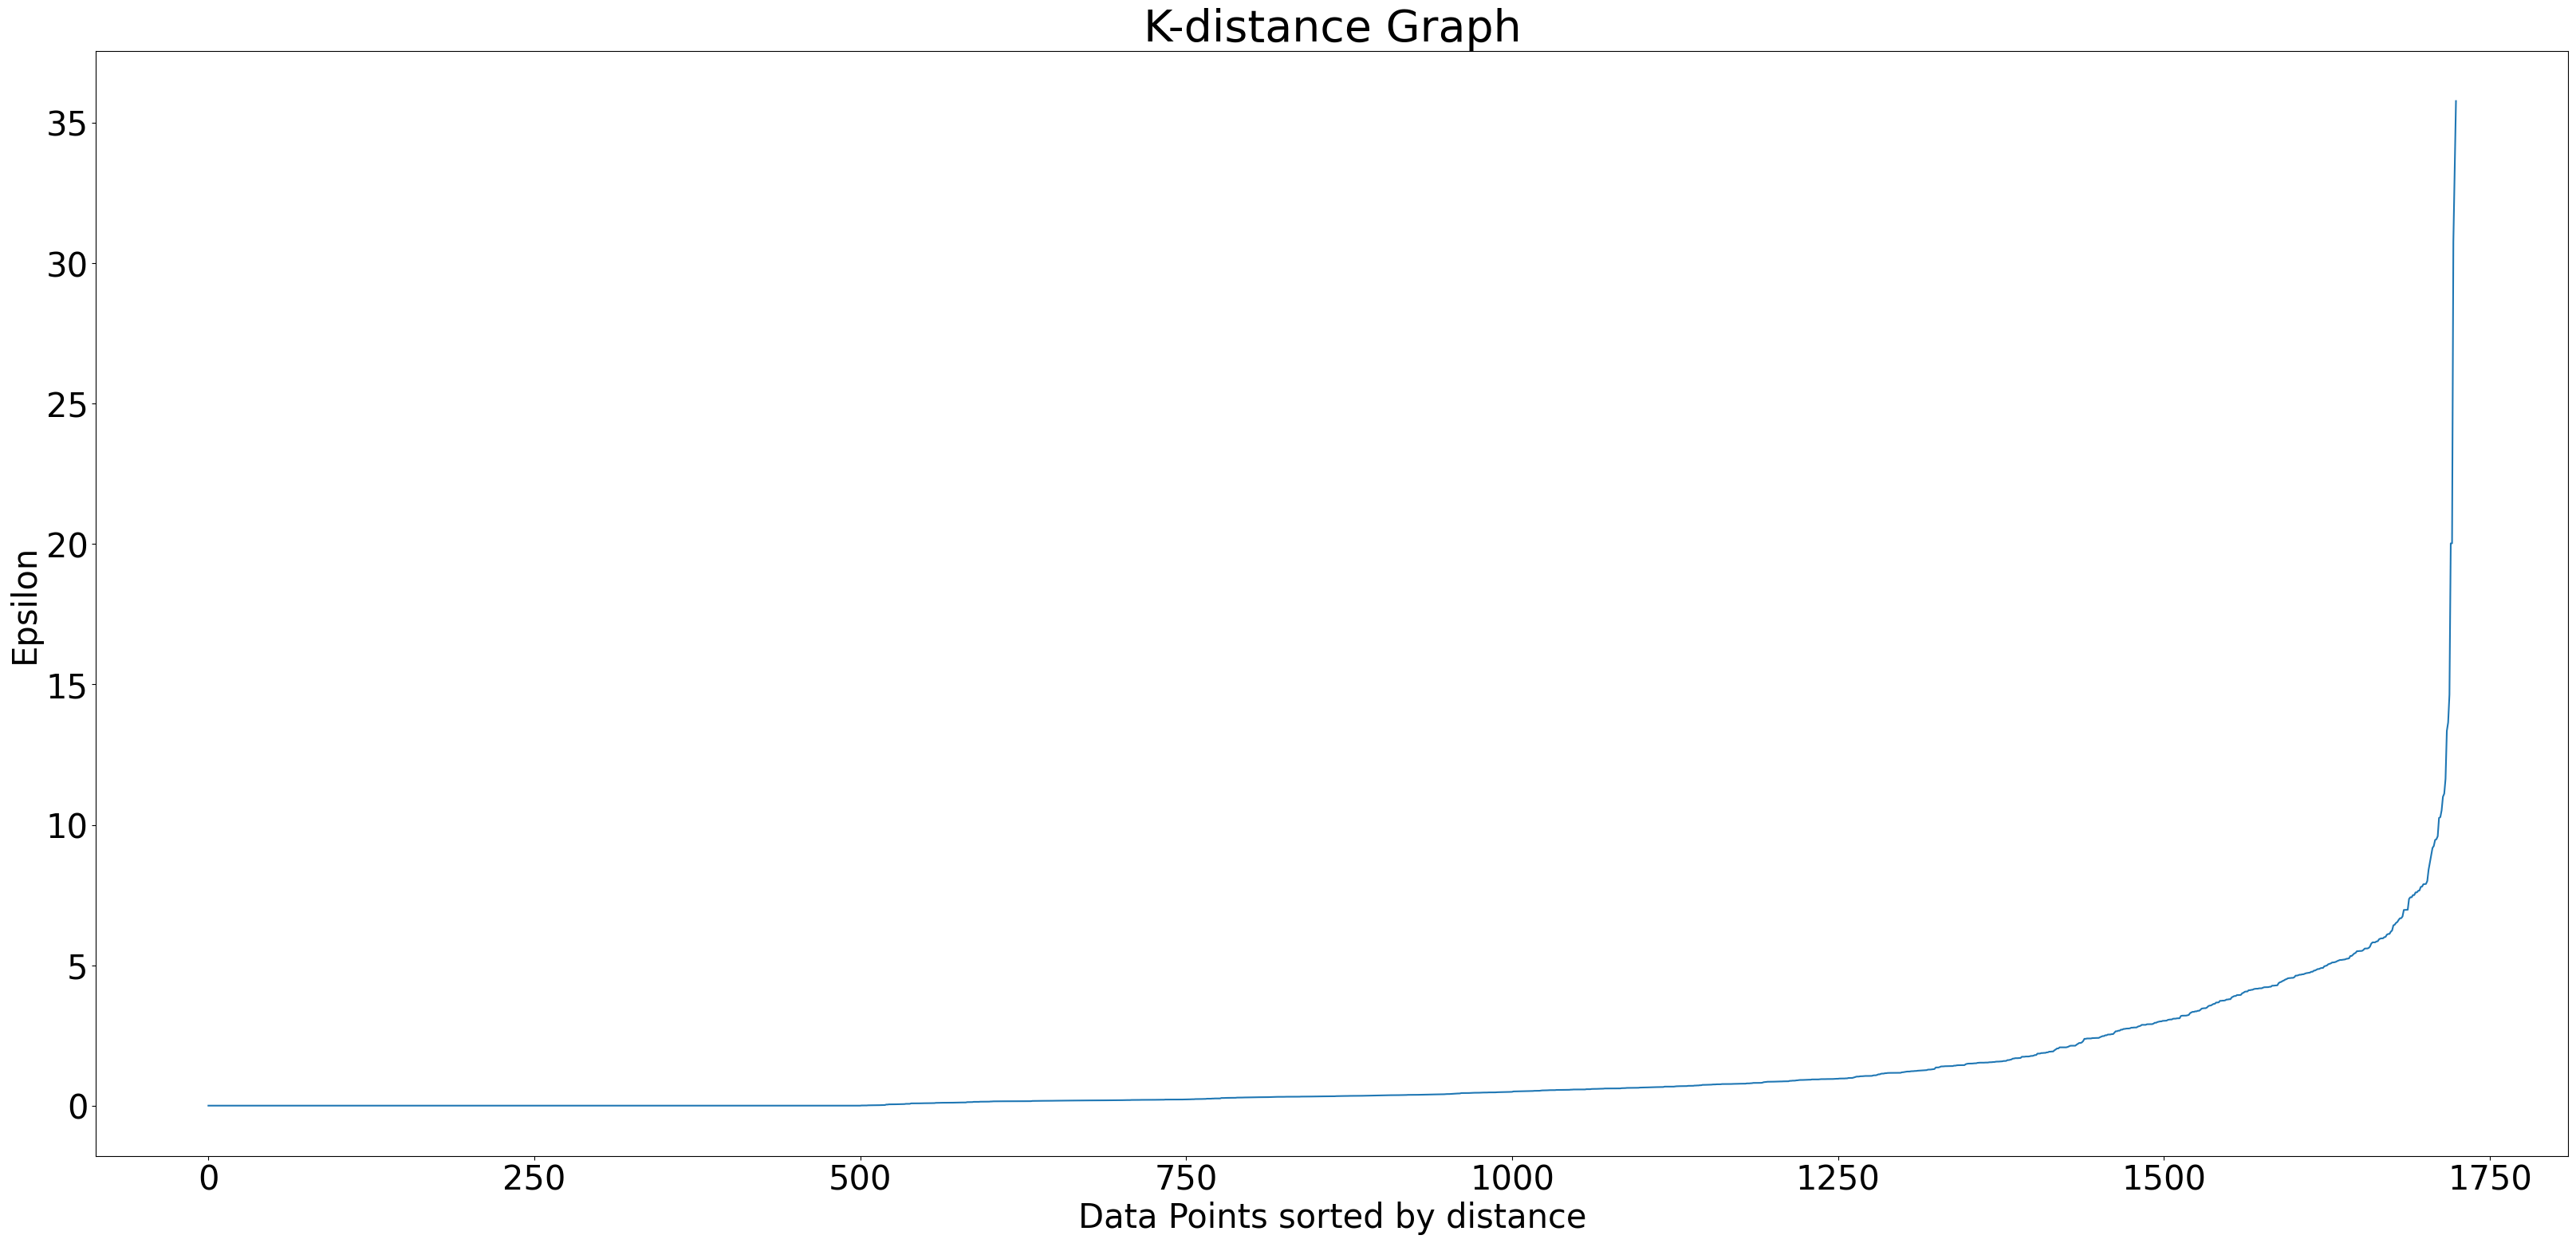

In [683]:
plt.figure(figsize=(40,18))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=40)
plt.xlabel('Data Points sorted by distance',fontsize=30)
plt.ylabel('Epsilon',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

=> Epsilon > 10, epsilon starts to increase exponentially

In [723]:
dbscan = DBSCAN(eps= 10, min_samples=5, n_jobs=-1)
dbscan.fit(std_num_features[numeric_features])
labels = dbscan.labels_
outlier_indices = np.where(labels == -1)[0]
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {len(outlier_indices)}")

Number of clusters: 4
Number of outliers: 43


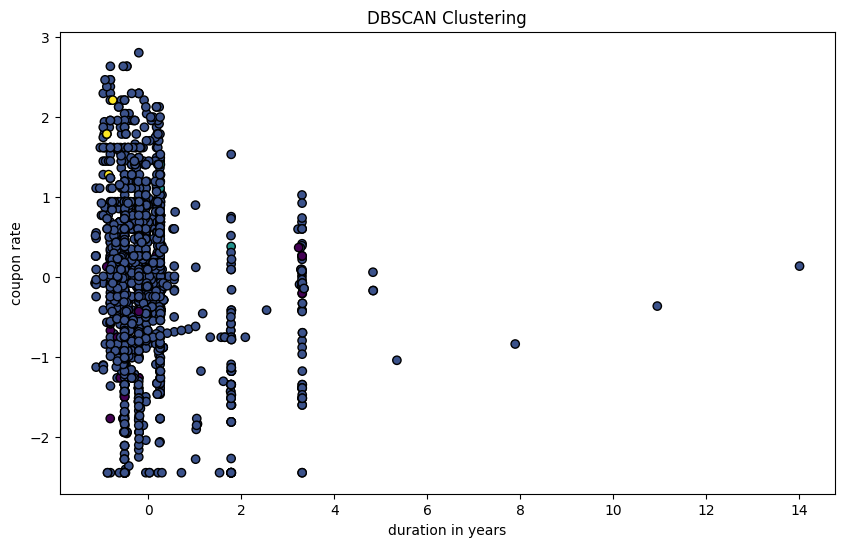

In [724]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(std_num_features["duration_in_years"], std_num_features["coupon rate"], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.xlabel('duration in years')
plt.ylabel('coupon rate')
plt.title('DBSCAN Clustering')
plt.show()

=> Clusters are not very helpful

In [725]:
print("Outliers")
std_num_features.iloc[outlier_indices,:]

Outliers


rr1_7     rr2_7    rr1_30    rr2_30 currency  \
85    0.094969  0.093568  0.098545  0.096688      USD   
138   0.157786  0.151418  0.120050  0.117326      USD   
182   0.399279  0.396295  0.364026  0.360110      USD   
329   0.008300  0.008299  0.008300  0.008299      MYR   
337   1.000000  1.000000  1.000000  1.000000      USD   
341   0.766690  0.765097  0.924683  0.917545      USD   
356   0.082722  0.082465  0.082331  0.081786      USD   
357   1.000579  0.997508  1.004122  0.997516      USD   
389   0.052137  0.052005  0.051851  0.051750      JPY   
390   0.052324  0.052180  0.052024  0.051914      JPY   
435   0.157783  0.157691  0.143367  0.143093      USD   
436   0.157783  0.157691  0.143377  0.143103      USD   
437   0.157783  0.157691  0.143367  0.143093      USD   
514   0.551696  0.551296  0.665298  0.663490      USD   
515   0.553711  0.553308  0.665768  0.663960      USD   
516   0.453333  0.451827  0.421644  0.419543      USD   
519   0.047674  0.046649  0.042355  0.041311      USD   
520   0.270840  0.268314  0.261468  0.258288      USD   
521   0.279071  0.278335  0.257406  0.256237      USD   
526   0.269952  0.267670  0.260633  0.257758      USD   
630   0.999880  1.000000  0.999880  1.000000      NOK   
631   1.003518  1.003701  1.003518  1.003701      NOK   
848   0.972105  0.970211  0.968251  0.965220      USD   
850   0.756584  0.755387  0.740940  0.737014      USD   
874   0.157298  0.156081  0.160784  0.158984      SGD   
876   0.158494  0.157113  0.160482  0.158715      SGD   
942   0.074393  0.072569  0.084935  0.082823      USD   
943   0.060322  0.059620  0.189797  0.186814      USD   
944   0.073679  0.071872  0.231268  0.226269      USD   
945   0.061394  0.060678  0.209719  0.206418      USD   
955   0.199319  0.196524  0.200077  0.198632      USD   
956   0.275926  0.272025  0.219682  0.217973      USD   
1032  0.786908  0.762576  0.771905  0.745329      USD   
1040  0.402095  0.401254  0.402250  0.401346      USD   
1067  0.314216  0.309150  0.169664  0.168091      USD   
1068  0.314245  0.309169  0.169587  0.168012      USD   
1251  0.104622  0.104141  0.105916  0.105293      USD   
1301  0.799672  0.772341  0.696979  0.686740      USD   
1302  0.848206  0.835975  0.749283  0.736045      USD   
1333  0.999883  1.000020  0.999883  1.000020      MYR   
1775  0.278571  0.270950  0.266333  0.258218      USD   
2057  0.630185  0.622730  0.645036  0.635732      USD   
2072  0.066853  0.064477  0.047666  0.046553      CAD   

                                             seniorioty  \
85                        Senior Subordinated Unsecured   
138                                           Unsecured   
182                              Subordinated Unsecured   
329                                           Unsecured   
337                                           Unsecured   
341                                      Senior Secured   
356                                    Senior Unsecured   
357                                    Senior Unsecured   
389                                           Unsecured   
390                                           Unsecured   
435                                    Senior Unsecured   
436                                    Senior Unsecured   
437                                    Senior Unsecured   
514                                    Senior Unsecured   
515                                    Senior Unsecured   
516                                    Senior Unsecured   
519   Junior Unsecured or Junior Subordinated Unsecured   
520                                    Senior Unsecured   
521                                    Senior Unsecured   
526                                    Senior Unsecured   
630                                           Unsecured   
631                                           Unsecured   
848                                    Senior Unsecured   
850                     Senior Secured - First Mortgage   
874                      

<Axes: xlabel='rr1_30', ylabel='Count'>

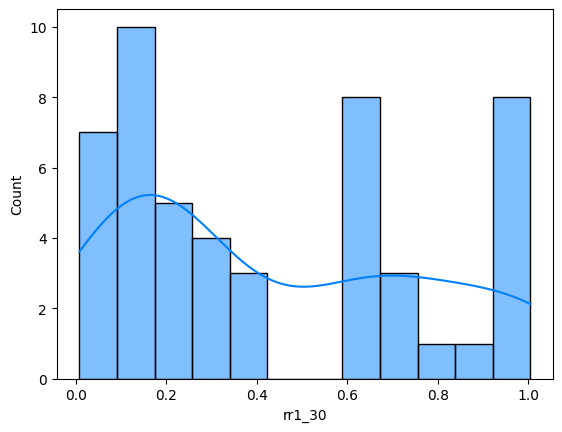

In [690]:
sns.histplot(std_num_features.iloc[outlier_indices,:]['rr1_30'], kde=True, bins=12, color=(0, 0.5, 1))

=> From this graph and the graph from mahalabonis distance analysis, it seems like most of the outliers are in the region when recovery rates are small (from 0 to 0.4) and when recovery rates are very high (>= 1)

AUTOMATED EDA

In [735]:
from ydata_profiling import ProfileReport

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [733]:
PROFILE_OUTPUT = "data/profile_output.html"

In [736]:
profile = ProfileReport(df)
profile.to_file(PROFILE_OUTPUT)

Summarize dataset: 100%|█████████▉| 30137/30140 [36:44<00:01,  1.60it/s, Detecting duplicates]                                                                                                /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  .reset_index(name=duplicates_key)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/ydata_profiling/model/pandas/duplicates_pandas.py:40: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-